#Introduction






Dans ce projet, nous étudions la relation entre l'évolution des prix des matières premières et la performance de trois secteurs majeurs de l'économie, représentés par des indices S&P spécifiques : le secteur financier, le secteur technologique et le secteur immobilier. L'objectif est d'analyser comment les fluctuations des prix des matières premières influencent, ou sont influencées par, les performances des secteurs financiers, technologiques et immobiliers, afin de mieux comprendre les interdépendances entre ces composantes majeures de l'économie.



# Question 1 : Données Utilisées

Les séries temporelles que nous utilisons couvrent la période allant d'octobre 2001 à fin 2023, avec une fréquence d'observation mensuelle. Ces données comportent 278 observations au total, ce qui nous permet d'explorer les relations sur une période suffisamment longue pour observer des tendances pertinentes et des évolutions économiques importantes. Les données incluent :

 Prix des matières premières :
 Nous avons choisi l'indice Bloomberg Commodity Index (BCOM). Cet indice mesure la performance des prix de diverses matières premières, y compris l'énergie, les métaux, et les produits agricoles. Il est pertinent car les matières premières ont un impact direct sur les coûts de production et, par conséquent, sur les performances économiques des différents secteurs.

 Secteur financier :
Représenté par l'indice S&P Financials Select Sector (S5FINL), qui regroupe les performances des entreprises du secteur financier (banques, assurances, services financiers). Ce secteur est particulièrement sensible aux fluctuations des prix des matières premières, car il influence directement les taux d'intérêt, les politiques monétaires et l'inflation.

 Secteur technologique :
 Représenté par l'indice S&P Information Technology (S5INFT). Ce secteur est souvent perçu comme moins lié aux matières premières, mais l'évolution des coûts énergétiques ou des matériaux critiques peut affecter la chaîne de production technologique et l'innovation.

Secteur immobilier :
Représenté par l'indice S&P Real Estate (S5RLST). L'immobilier est sensible aux coûts des matériaux de construction, souvent liés aux prix des matières premières, ainsi qu'aux taux d'intérêt, eux-mêmes influencés par les fluctuations des prix des ressources.

Questions de Recherche

Ce projet vise à répondre aux questions suivantes :

Quelle est la causalité entre les prix des matières premières et la performance des secteurs financiers, technologiques et immobiliers ?

Les fluctuations des prix des matières premières ont-elles un impact différencié sur ces secteurs, et si oui, dans quelle mesure ?

Les différents secteurs réagissent-ils de manière similaire ou opposée face à des hausses ou baisses significatives des prix des matières premières ?

L'objectif est donc d'étudier ces relations et d'identifier les dynamiques sous-jacentes qui lient les prix des matières premières et les performances de ces secteurs clés de l'économie.

In [ ]:
# Installer les packages si nécessaire
system("gdown --id 1ZRko34j4ILbpVJW719piRbAcrj2nDxUl")
untar("library.tar.gz", "library")
.libPaths("library")

# Charger les packages
library(readxl)
library(ggplot2)
library(forecast)
library(gridExtra)
library(urca)
library(moments)
library(FinTS)
library(reshape2)
library(vars)
library(lpirfs)
library(vctrs)
library(exuber)
library(MultipleBubbles)


Sys.setenv("R_LIBS_USER"="library")
install.packages("googledrive")

system("gdown --id 1af44cuKyOBDx1xcZPSfTGo-rMeiXsc2Z")

df <-read_excel("donnees.xlsx")

Installing package into ‘/content/library’
(as ‘lib’ is unspecified)



# Question 2 :  les représentations graphiques et les acf et pacf


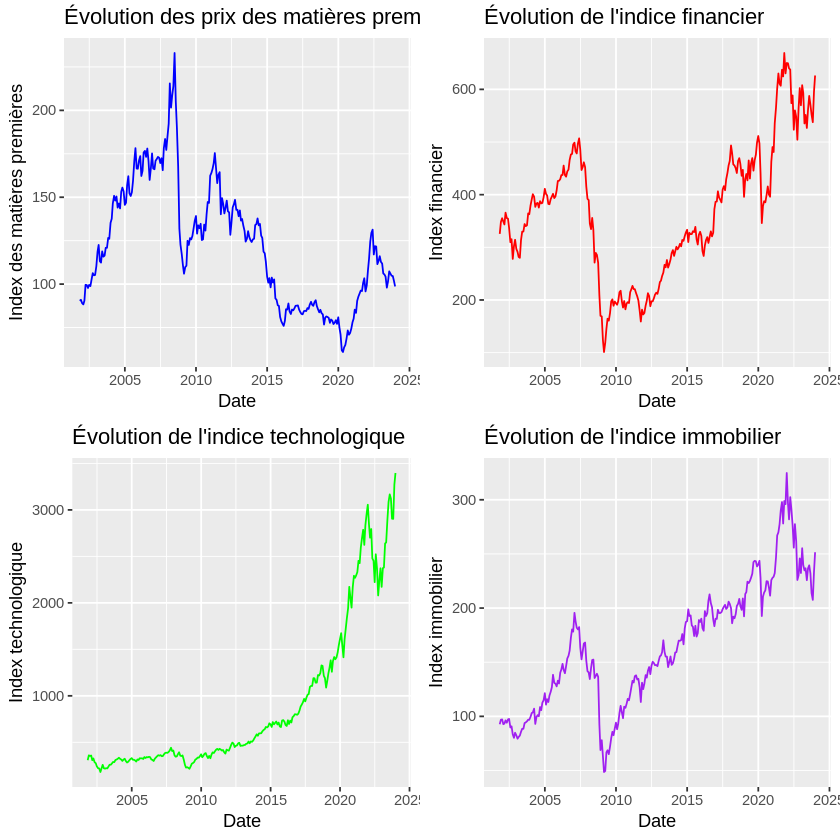

In [ ]:
# S'assurer que la colonne 'Dates' est en format Date
df$Dates <- as.Date(df$Dates)

# Graphique pour les matières premières
plot_matiere <- ggplot(df, aes(x = Dates, y = matière_première)) +
  geom_line(color = "blue") +
  labs(title = "Évolution des prix des matières premières", x = "Date", y = "Index des matières premières")

# Graphique pour le secteur financier
plot_financiere <- ggplot(df, aes(x = Dates, y = financière)) +
  geom_line(color = "red") +
  labs(title = "Évolution de l'indice financier", x = "Date", y = "Index financier")

# Graphique pour le secteur technologique
plot_technologie <- ggplot(df, aes(x = Dates, y = technologie)) +
  geom_line(color = "green") +
  labs(title = "Évolution de l'indice technologique", x = "Date", y = "Index technologique")

# Graphique pour le secteur immobilier
plot_real_estate <- ggplot(df, aes(x = Dates, y = real_estate)) +
  geom_line(color = "purple") +
  labs(title = "Évolution de l'indice immobilier", x = "Date", y = "Index immobilier")

# Combiner les graphiques
grid.arrange(plot_matiere, plot_financiere, plot_technologie, plot_real_estate, ncol = 2)

A première vu, aucune de ces séries n'a l'air stationnaire.


Un autocorrelogramme (ACF) et un autocorrelogramme partiel (PACF) permettent d’analyser les dépendances temporelles dans une série. L’ACF mesure la corrélation brute entre les valeurs de la série à différents décalages (lags), avec des barres verticales représentant les coefficients d’autocorrélation. Si ces barres diminuent lentement et dépassent souvent les lignes de significativité, cela indique une dépendance persistante et souvent une non-stationnarité de la série. Le PACF, en revanche, mesure la corrélation partielle entre les valeurs en isolant l’effet des lags intermédiaires, ce qui le rend particulièrement utile pour identifier le nombre de lags pertinents dans un modèle autorégressif (AR). Pour une série non stationnaire, l’ACF présente une décroissance lente tandis que le PACF montre des barres significatives aux premiers lags. Dans une série stationnaire, l’ACF diminue rapidement vers zéro, et le PACF présente un nombre limité de barres significatives. Par ailleurs, l’ACF est utile pour détecter des comportements globaux comme des tendances ou des cycles, tandis que le PACF aide à isoler les lags spécifiques pour modéliser la série. Ensemble, ils guident le choix des modèles ARIMA : une décroissance lente de l’ACF et des premières barres significatives du PACF suggèrent un modèle AR, tandis qu’un découpage net dans l’ACF et une décroissance graduelle dans le PACF indiquent un modèle MA.

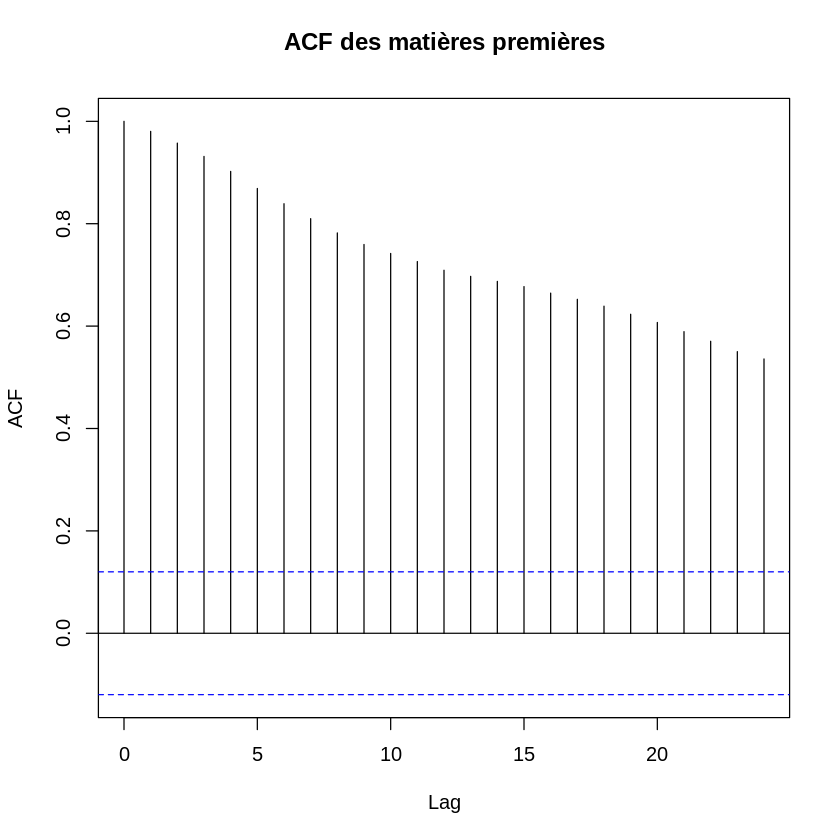

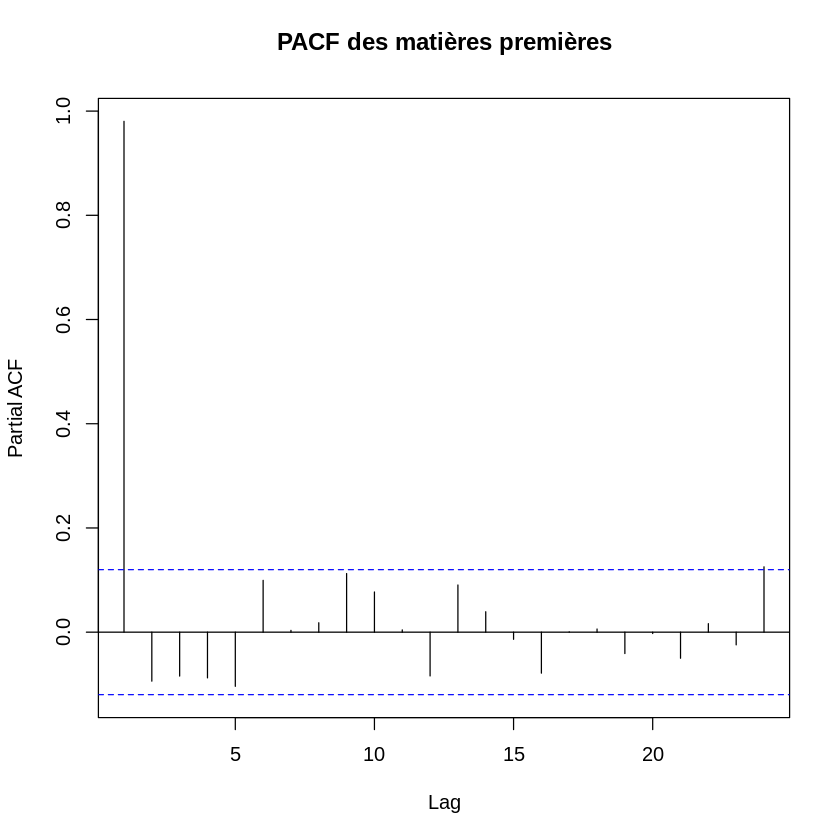

In [ ]:
# ACF et PACF pour les matières premières
acf(df$matière_première, main = "ACF des matières premières")
pacf(df$matière_première, main = "PACF des matières premières")


Le déclin lent et progressif de l'ACF indique une dépendance à long terme, suggérant que la série est non stationnaire et nécessite une différenciation pour la stationnariser.

Cet autocorrélogramme partiel montre clairement que l'influence des observations précédentes s'arrête après lag 1. Il est probable que la série puisse être bien modélisée par un modèle AR(1), où la valeur de chaque observation dépend uniquement de la valeur de l'observation précédente.

Voir annexes pour les autres séries temporelles.


#Question 3 :  test de racine unitaire et stationnarisation




##Test ADF

Pour confirmer la non-stationnarité de la série, nous effectuerons des tests de racine unitaire tels que le test de Dickey-Fuller. L'hypothèse nulle de ce test stipule que la série est non stationnaire (présence d'une racine unitaire), tandis que l'hypothèse alternative suggère que la série est stationnaire. Si la statistique t du test est inférieure à la valeur critique , l'hypothèse nulle est rejetée, ce qui indique que la série est stationnaire. En revanche, si la statistique t est supérieure à la valeur critique , l’hypothèse nulle ne peut être rejetée, et la série est considérée comme non stationnaire. Dans ce cas, la stationnarisation pourra être réalisée par différenciation, suppression de la tendance, ou suppression des composantes saisonnières, en fonction des caractéristiques identifiées dans les données.

Test de Dickey-Fuller pour la série des Matières Premières

In [ ]:
#Avec constante et tendance déterministe :
adf1<-ur.df(y = na.omit(df$matière_première),type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.019  -2.966   0.316   3.349  24.367 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.073826   2.660618   3.410 0.000756 ***
z.lag.1     -0.052849   0.015389  -3.434 0.000695 ***
tt          -0.018927   0.007074  -2.676 0.007950 ** 
z.diff.lag1  0.088857   0.061463   1.446 0.149507    
z.diff.lag2  0.084542   0.061621   1.372 0.171294    
z.diff.lag3  0.092498   0.061776   1.497 0.135567    
z.diff.lag4  0.127464   0.061621   2.069 0.039615 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.367 on 251 degrees of freedom
Multiple R-squared:  0.07836,	Adjusted R-squared:  0.05633 
F-statistic: 3.557 on 6 and 251 DF,  p-va

La t-stat est égale à -3.4342 elle est supérieure à la valeurs critiques aux seuils de 1% qui est égale -3.98 (On prend la valeur à 1% car on préfère être conservateur car très proche de la valeur critique à 5%)
On ne peut donc pas rejetter l'hypothèse nulle de non stationnarité.

Le t-stat de la tendance déterministe est égal à -2.676 et est inférieure à 3.14 le seuil de rejet à 5 %. On ne rejette donc pas l'hypothèse nulle disant que la tendance déterministe n'est pas significative. On passe au modèle avec une constante uniquement.


In [ ]:
#Test ADF avec la constante :
adf2<-ur.df(y = na.omit(df$matière_première),type=c("drift"), lag=8, selectlags = c('AIC'))
summary(adf2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-30.6829  -2.7614   0.0043   3.2583  24.6125 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  2.87463    1.50499   1.910   0.0573 .
z.lag.1     -0.02349    0.01183  -1.986   0.0481 *
z.diff.lag1  0.09681    0.06234   1.553   0.1217  
z.diff.lag2  0.08507    0.06229   1.366   0.1733  
z.diff.lag3  0.08949    0.06238   1.435   0.1526  
z.diff.lag4  0.12527    0.06226   2.012   0.0453 *
z.diff.lag5 -0.09458    0.06257  -1.512   0.1319  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.428 on 251 degrees of freedom
Multiple R-squared:  0.06063,	Adjusted R-squared:  0.03817 
F-statistic:   2.7 on 6 and 251 DF,  p-value: 0.01474


Valu

Notre statistique de test vaut -1.9859 elle est donc supérieure à la valeur critique au seuil de 5% qui est égale à -2.87. Donc on ne peut pas rejetter l'hypothèse nulle de racine unitaire. La série est donc non stationnaire.

Le t-stat de la constante est égal à -1.910 et est inférieure à 2.86 le seuil de rejet à 5 %. On ne rejette pas l'hypothèse nulle que la constante n'est pas significative. On passe au modèle sans constante ni tendance.

In [ ]:
#Test ADF sans la constante ni tendance déterministe :
adf2<-ur.df(y = na.omit(df$matière_première),type=c("none"), lag=8, selectlags = c('AIC'))
summary(adf2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.711  -2.450   0.361   3.628  23.591 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
z.lag.1     -0.001710   0.003162  -0.541   0.5891  
z.diff.lag1  0.091067   0.062590   1.455   0.1469  
z.diff.lag2  0.076478   0.062457   1.224   0.2219  
z.diff.lag3  0.078666   0.062449   1.260   0.2089  
z.diff.lag4  0.113104   0.062259   1.817   0.0705 .
z.diff.lag5 -0.109402   0.062414  -1.753   0.0808 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.461 on 252 degrees of freedom
Multiple R-squared:  0.04697,	Adjusted R-squared:  0.02428 
F-statistic:  2.07 on 6 and 252 DF,  p-value: 0.05725


Value of test-statistic is: -0.5408 

Critical values for t


La statistique de test est de  -0.5408, ce qui est supérieur aux valeurs critiques aux seuils de 1 %, 5 % et 10 %, qui sont respectivement égales à -2,58, -1,95 et -1,62. Par conséquent, nous ne pouvons pas rejeter l'hypothèse nulle de racine unitaire. Cela suggère que la série est non stationnaire selon le test ADF.

Les résultats du test ADF indiquent que la série des matières premières suit un processus de marche aléatoire sans tendance ni constante. En d'autres termes, la série est stationnaire en différences, mais non stationnaire en niveau. Cela signifie qu'elle possède une racine unitaire, ce qui implique qu'une différenciation (prise de la première différence) permettrait de rendre la série stationnaire.




Voir annexes pour les autres séries temporelles.


##  Test KPSS


In [ ]:
#Test KPSS pour la série des Matières Premières.
#Test de stationnarité autour d'une tendance déterministe
kpss_tau_MP<-ur.kpss(df$`matière_première`,type="tau",lags="long")
summary(kpss_tau_MP)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 15 lags. 

Value of test-statistic is: 0.1912 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216



La t-statistique est égale à 0,1912 qui est supérieurs à la valeur critiques au seuil de 5% égale à 0,146.
Donc on rejette l'hypothèse nulle de stationnarité.



In [ ]:
#Test de stationnarité autour d'une constante:
kpss_mu_MP<-ur.kpss(df$`matière_première`,type="mu",lags="long")
summary(kpss_mu_MP)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 15 lags. 

Value of test-statistic is: 0.9061 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


La t-statistique est égale à 0,9061, ce qui est supérieure à la valeur critique au seuil de 5 %, qui est de 0,463. Par conséquent, nous rejetons l'hypothèse nulle de stationnarité. Comme les résultats du test de Dickey-Fuller, nous concluons que la série des Matières Premières suit un processus de marche aléatoire sans tendance ni constante. Cela indique que la série est non stationnaire en niveau. Pour rendre la série stationnaire, il est nécessaire de la différencier, ce qui permet d'éliminer la racine unitaire et de stabiliser les propriétés statistiques au cours du temps.


In [ ]:
#Stationnarisation avec la méthode de la différenciation
diff_series_MP <- diff(df$`matière_première`, differences = 1)
adf_test_diff_MP <- ur.df(y = na.omit(diff_series_MP),type=c("trend"), lag=8, selectlags = c('AIC'))

kpss_tau_MP_diff<-ur.kpss(diff_series_MP,type="tau",lags="long")
summary(adf_test_diff_MP)
summary(kpss_tau_MP_diff)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-30.5874  -2.6848   0.3228   3.5576  22.3154 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.669612   0.848975   0.789  0.43103    
z.lag.1     -1.036242   0.156906  -6.604 2.45e-10 ***
tt          -0.004799   0.005455  -0.880  0.37982    
z.diff.lag1  0.098951   0.145081   0.682  0.49585    
z.diff.lag2  0.162431   0.135547   1.198  0.23194    
z.diff.lag3  0.232613   0.126547   1.838  0.06725 .  
z.diff.lag4  0.358528   0.117897   3.041  0.00261 ** 
z.diff.lag5  0.278288   0.111983   2.485  0.01362 *  
z.diff.lag6  0.257515   0.101079   2.548  0.01145 *  
z.diff.lag7  0.219530   0.086064   2.551  0.01136 *  
z.diff.lag8  0.098744   0.063471   1.556  0.12105    



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 15 lags. 

Value of test-statistic is: 0.1017 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216




Après avoir différencié la série des Matières Premières, nous avons effectué le test de Dickey-Fuller. La t-statistique obtenue est de -6.6042, ce qui est bien inférieur à la valeur critique au seuil de 5 %, égale à -1,95. Par conséquent, nous rejetons l'hypothèse nulle de non-stationnarité, ce qui indique que la série différenciée des Matières Premières est stationnaire.

Lors du test KPSS, la statistique de test est égale à 0,1017, tandis que la valeur critique au seuil de 5 % est de 0,146. Étant donné que 0,1017 < 0,146, nous ne pouvons pas rejeter l'hypothèse nulle de stationnarité, confirmant ainsi que la série différenciée des Matières Premières est stationnaire.

Après avoir vérifié les résultats des deux tests (Dickey-Fuller et KPSS) sur la série différenciée, nous pouvons conclure que la série des Matières Premières est stationnaire après différenciation.

In [ ]:
#Stationarisation des autres series :
diff_series_SNP_FI <- diff(df$`financière`, differences = 1)
diff_series_SNP_Tech <- diff(df$`technologie`, differences = 1)
diff_series_SNP_RL <- diff(df$`real_estate`, differences = 1)


Voir annexes pour les tests sur les autres séries temporelles.


# Question 4 :  le modèle ARMA satisfaisant les conditions de validité


## Séléction d'un modéle ARMA :

Nous allons analyser l'une des séries temporelles afin de déterminer le modèle ARMA (AutoRegressive Moving Average) le plus adapté. L'analyse débutera par une vérification de la stationnarité de la série, suivie de l'examen des fonctions d'autocorrélation (ACF) et d'autocorrélation partielle (PACF) pour identifier les ordres p et q du modèle ARMA. Ensuite, un modèle sera ajusté et les résidus seront testés pour valider l'absence de structure d'autocorrélation et la normalité des erreurs, garantissant ainsi que le modèle satisfait les conditions de validité.

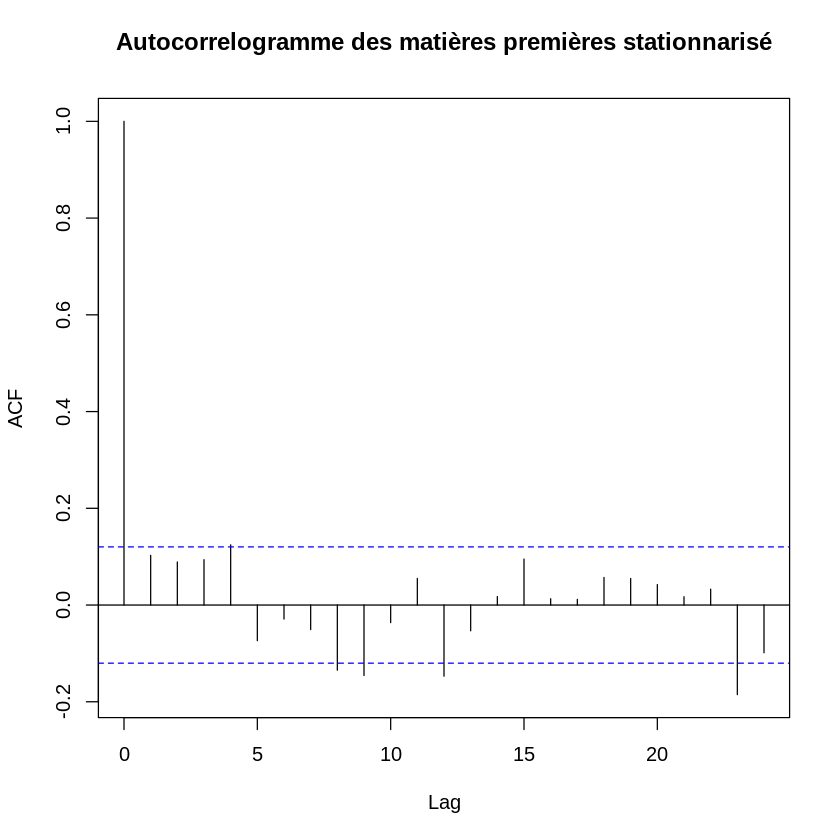

In [ ]:
acf_diff_series_MP <- acf(na.omit(diff_series_MP), main = "Autocorrelogramme des matières premières stationnarisé")

À l'exception du lag 0, où l'autocorrélation est élevée, aucune des autres autocorrélations n'est significative, car elles restent à l'intérieur des intervalles de confiance (les lignes bleues). Cela indique qu'après la stationnarisation, la série ne présente plus de dépendance temporelle significative au-delà du premier retard.

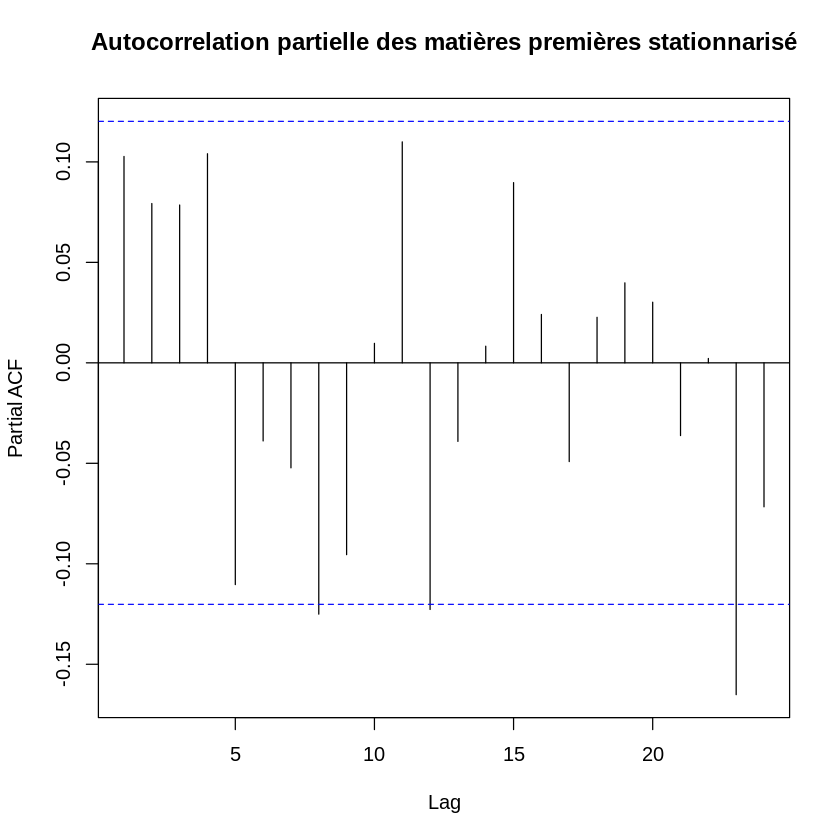

In [ ]:
pacf_diff_series_MP <- pacf(na.omit(diff_series_MP), main = "Autocorrelation partielle des matières premières stationnarisé")

En observant le PACF, on constate qu'aucune des barres ne dépasse les lignes de significativité (les lignes bleues). Cela indique qu'aucune des autocorrélations partielles pour les différents lags n'est statistiquement significative. Par conséquent, on ne peut pas rejeter l'hypothèse nulle selon laquelle il n'y a pas d'autocorrélation significative à ces lags.

Etant donné qu'aucun des lags dans l'ACF et le PACF n'est statistiquement significatif, cela suggère qu'aucun des coefficients AR ou MA que l'on pourrait inclure dans un modèle ARMA ne serait significatif. Par conséquent, il n'est pas pertinent de tenter d'ajuster un modèle ARMA, car cela ne contribuerait pas à une modélisation efficace de la série.

In [ ]:
best_ARMA <-auto.arima(diff_series_MP,max.p = 4,max.q=4,max.d=0)
class(best_ARMA)
summary(best_ARMA)
arimaorder(best_ARMA)

[1] "forecast_ARIMA" "ARIMA"          "Arima"

Series: diff_series_MP 
ARIMA(0,0,0) with zero mean 

sigma^2 = 41.87:  log likelihood = -874.13
AIC=1750.26   AICc=1750.28   BIC=1753.85

Training set error measures:
                     ME     RMSE      MAE MPE MAPE      MASE      ACF1
Training set 0.03097331 6.470604 4.488079 100  100 0.7186068 0.1026891

p d q 
0 0 0

Lorsque la fonction retourne un modèle avec p = 0, d = 0 et q = 0, cela indique que le modèle ARMA sélectionné est en fait un modèle constant sans termes autorégressifs ni de moyennes mobiles. Cela peut suggérer qu'un modèle ARMA est inutile dans ce cas. Ce modèle correspond à un bruit blanc, indiquant qu'il n'y a pas de structure temporelle significative à modéliser dans les résidus. Cela confirme nos conclusions de l'analyse de l'acf et pacf.

## Test sur les résidus :

###Test d'absence d'autocorrélation de Ljung-Box :



On teste l'absence d'autocorrélation des résidus jusqu'à l'ordre 10. Les hypothèses du test sont :

\begin{align*}
H_0 &: \rho(1) = \rho(2) = \cdots = \rho(10) = 0, \\
H_a &: \exists i \in \{1, \cdots, 10\} \text{ tel que } \rho(i) \neq 0.
\end{align*}

Installing package into ‘/content/library’
(as ‘lib’ is unspecified)




	Ljung-Box test

data:  Residuals
Q* = 25.275, df = 10, p-value = 0.004848

Model df: 0.   Total lags used: 10



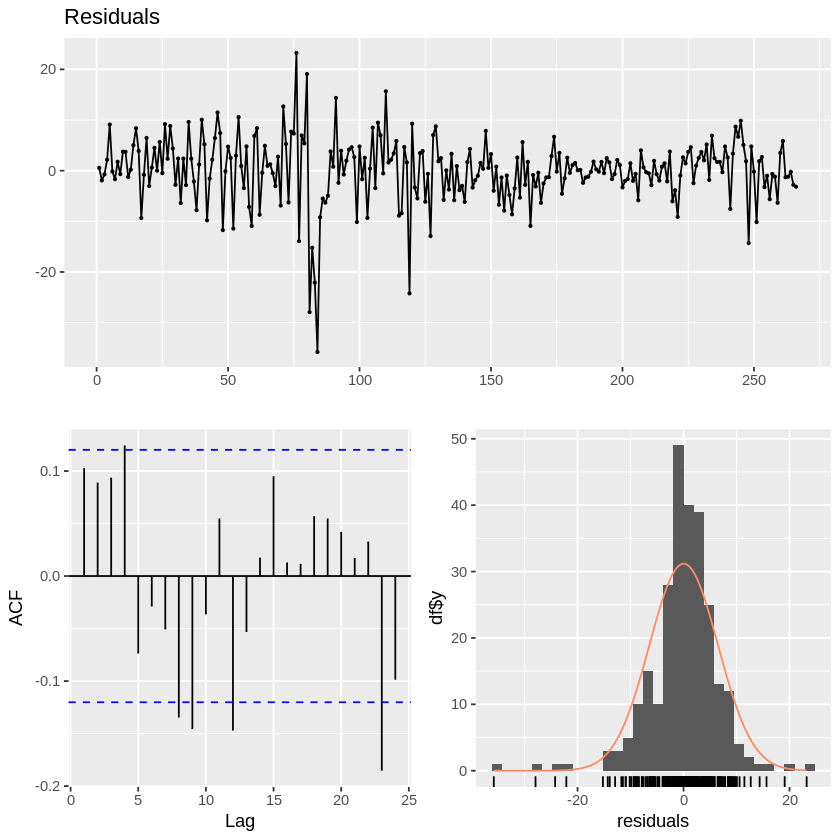

In [ ]:
install.packages("forecast")
library(forecast)
test_resAR3<-checkresiduals(diff_series_MP,lag = 10)


L'autocorrélogramme révèle que certaines autocorrélations dépassent les bornes de l'intervalle de confiance à 95 %, ce qui indique qu'elles sont significativement différentes de 0. Cela suggère une persistance de la structure dans les données qui pourrait nécessiter un ajustement par un modèle.


La statistique de test de Ljung-Box est égale à Q(10) = 25,275.
Étant donné qu'aucun modèle ARMA (comme un AR(3), par exemple) n'a été ajusté aux données, il n'est pas nécessaire de soustraire le nombre de paramètres estimés (k = 3) pour déterminer les degrés de liberté dans la loi du χ². On utilise directement le nombre de décalages (lags) choisi pour le test, soit df = 10. En comparant Q(10) = 25,275 à la valeur critique du χ² à df = 10 et au seuil de 5 % (≈ 18,31), on observe que Q(10) > 18,31. Par conséquent, on rejette l'hypothèse nulle d'indépendance des résidus.
Cela signifie que les résidus ne sont pas purement aléatoires, et il pourrait être nécessaire de modéliser davantage la structure dans les données. Ce qui parait incohérent avec le fait que notre modèle est un bruit blanc.








###Test de l'hypothèse de normalité des résidus










On représente l'histogramme des résidus sous forme de barres grises afin de visualiser leur distribution empirique, ainsi que la courbe d'une loi normale en rouge ayant la même moyenne et le même écart-type que les résidus, superposée pour comparer leur distribution avec une distribution normale théorique

[1] 76

[1] 84

[1] "Skewness des residus : -1.290209"

[1] "Kurtosis des residus : 8.491797"

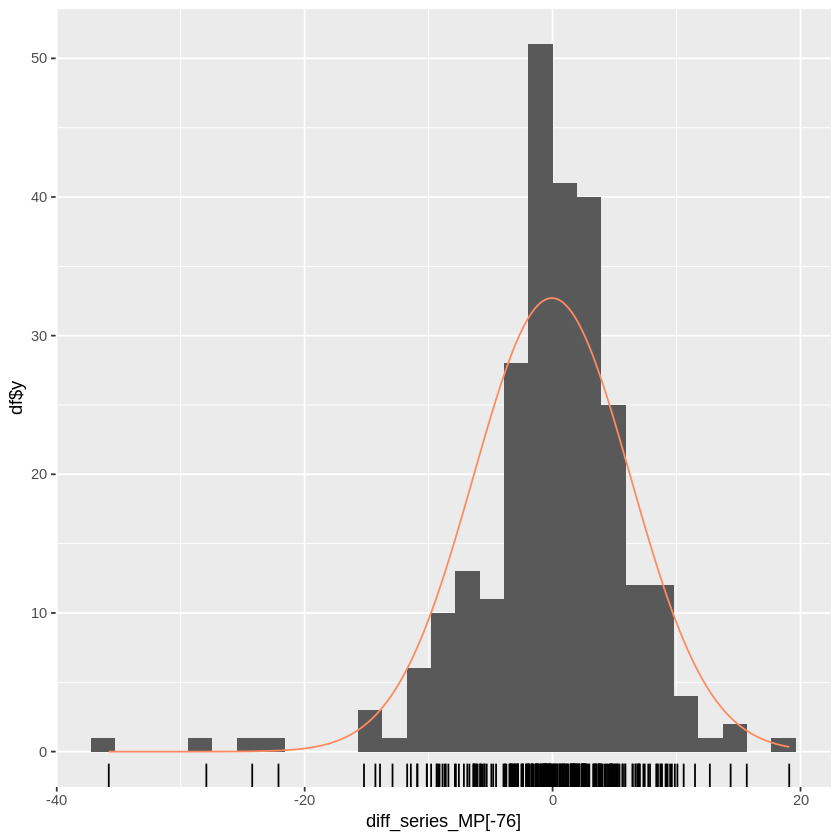

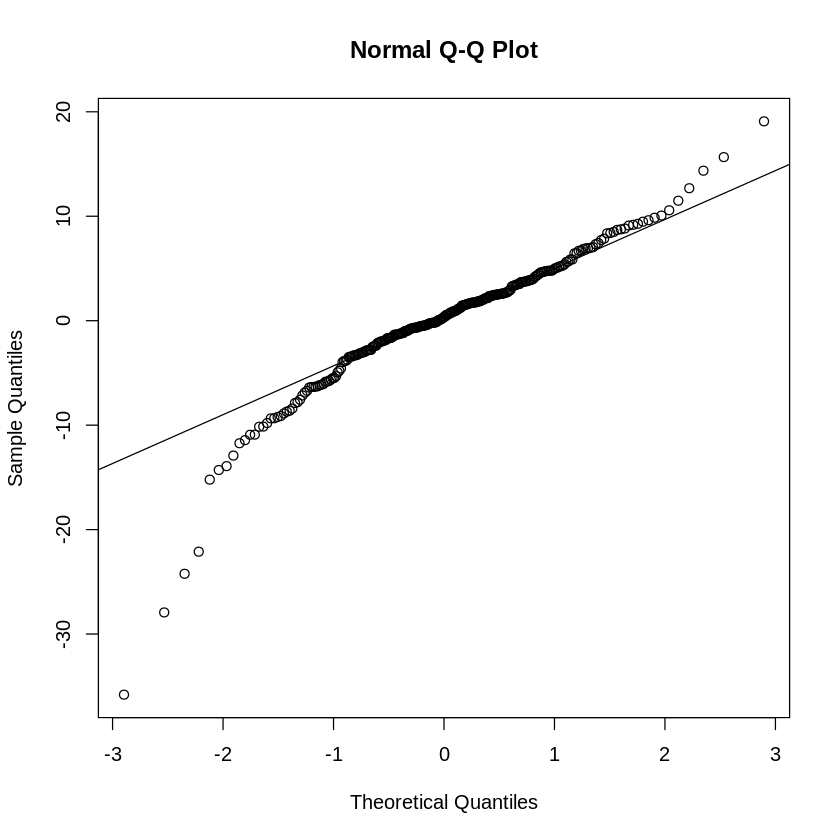

In [ ]:
which(diff_series_MP == max(diff_series_MP, na.rm = TRUE))
which(diff_series_MP == min(diff_series_MP, na.rm = TRUE))


gghistogram(diff_series_MP[-76], add.normal = TRUE)

sprintf("Skewness des residus : %f", skewness(diff_series_MP[-76], na.rm = TRUE))
sprintf("Kurtosis des residus : %f", kurtosis(diff_series_MP[-76], na.rm = TRUE))
qqnorm(diff_series_MP[-76])
qqline(diff_series_MP[-76])

La skewness des résidus est de -1.077504, ce qui indique une certaine asymétrie négative (queue à gauche). Cela signifie que les résidus ont une tendance à présenter des valeurs plus petites que la moyenne, ce qui dévie de la symétrie d'une distribution normale. Idéalement, une skewness proche de 0 indiquerait une distribution plus symétrique. L'asymétrie négative ici suggère que les résidus sont légèrement étendus vers les valeurs négatives.     


La kurtosis des résidus est de 8.625511, ce qui est bien au-dessus de la valeur de 3 caractéristique d'une distribution normale (distribution mesokurtique). Ce résultat indique une kurtosis élevée, ce qui signifie que les résidus ont des queues plus épaisses et plus de valeurs extrêmes (outliers) que ce que l'on observerait dans une distribution normale. Une kurtosis élevée peut suggérer que le modèle ne capture pas complètement certains événements extrêmes, et que la série peut contenir des valeurs rares mais significatives.

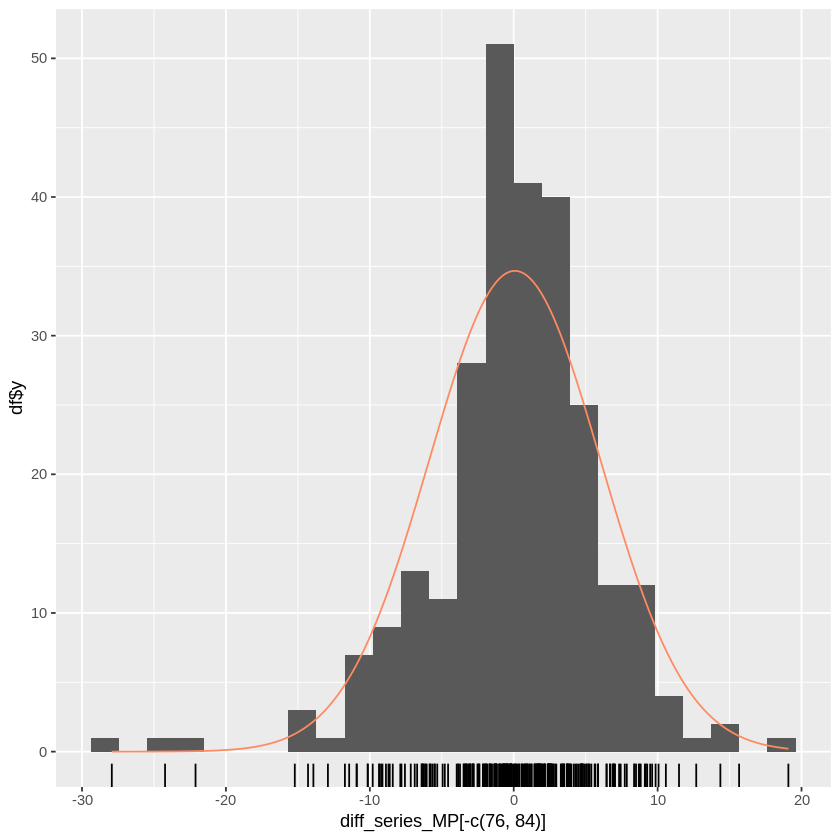

In [ ]:
gghistogram(diff_series_MP[-c(76,84)], add.normal = TRUE)
#pas sur du 84

On peut voir qu'il existe des différences entre les deux histogrammes ce qui permet de supposer que les résidus ne suivent pas une loi normale.

###Test de l'hypothèse en normalité de Jarque and Bera

In [ ]:
sprintf("Skewness des residus : %f",skewness(diff_series_MP[-c(76,84)]))
sprintf("kurtosis des residus : %f",kurtosis(diff_series_MP[-c(76,84)]))


[1] "Skewness des residus : -0.805439"

[1] "kurtosis des residus : 6.051175"

La skewness des résidus est de -0,805439, indiquant une légère asymétrie négative. Cela signifie que les résidus présentent une queue plus étendue du côté gauche par rapport à une distribution normale parfaitement symétrique.

La kurtosis est de 6,051175, ce qui est nettement supérieur à 3 (valeur attendue pour une distribution normale). Cela suggère que les résidus ont une distribution leptokurtique, caractérisée par des queues plus épaisses et un pic plus marqué que la normale.

Ces valeurs indiquent que les résidus s'écartent d'une distribution normale, notamment à cause de leur asymétrie et de leurs queues épaisses.

Les hypothèses du test sont :


\begin{cases}
H_0 : S(X) = 0 \ \text{et} \ K(X) = 3 \\
H_1 : S(X) \neq 0 \ \text{ou} \ K(X) \neq 3
\end{cases}



In [ ]:
library(tseries)

jarque.bera.test(diff_series_MP[-76][!is.na(diff_series_MP[-76]) & !is.infinite(diff_series_MP[-76])])


	Jarque Bera Test

data:  diff_series_MP[-76][!is.na(diff_series_MP[-76]) & !is.infinite(diff_series_MP[-76])]
X-squared = 406.54, df = 2, p-value < 2.2e-16


Les hypothèses du test de Jarque-Bera sont les suivantes :  


\begin{cases}
H_0 : S(X) = 0 \ \text{et} \ K(X) = 3 \quad \text{(les résidus suivent une loi normale)} \\
H_1 : S(X) \neq 0 \ \text{ou} \ K(X) \neq 3 \quad \text{(les résidus ne suivent pas une loi normale)}
\end{cases}


La statistique du test est = 406.54


Sous l’hypothèse nulle, la statistique suit une loi chi^2(2). Les seuils critiques correspondants sont :  

\begin{aligned}
\bullet \quad \chi^2_{0.90}(2) &= 4,61 \quad \text{(risque de 10%)}, \\
\bullet \quad \chi^2_{0.95}(2) &= 5,99 \quad \text{(risque de 5%)}, \\
\bullet \quad \chi^2_{0.99}(2) &= 9,21 \quad \text{(risque de 1%)}.
\end{aligned}


La statistique  = 406.54 est très largement supérieure aux seuils critiques pour tous les niveaux de risque (1%, 5%, et 10%). Par conséquent, **on rejette l’hypothèse nulle** d’une distribution normale des résidus.  

De plus, la probabilité critique associée au test (p-value) est inférieure à \( 2,2 * 10^{-16} \), confirmant que l’hypothèse nulle est rejetée même pour des seuils de signification très faibles (1%, 5%, et 10%).  

**Conclusion** : Les résidus ne suivent pas une loi normale.


###Test de Engle Granger d'absence d'effet ARCH


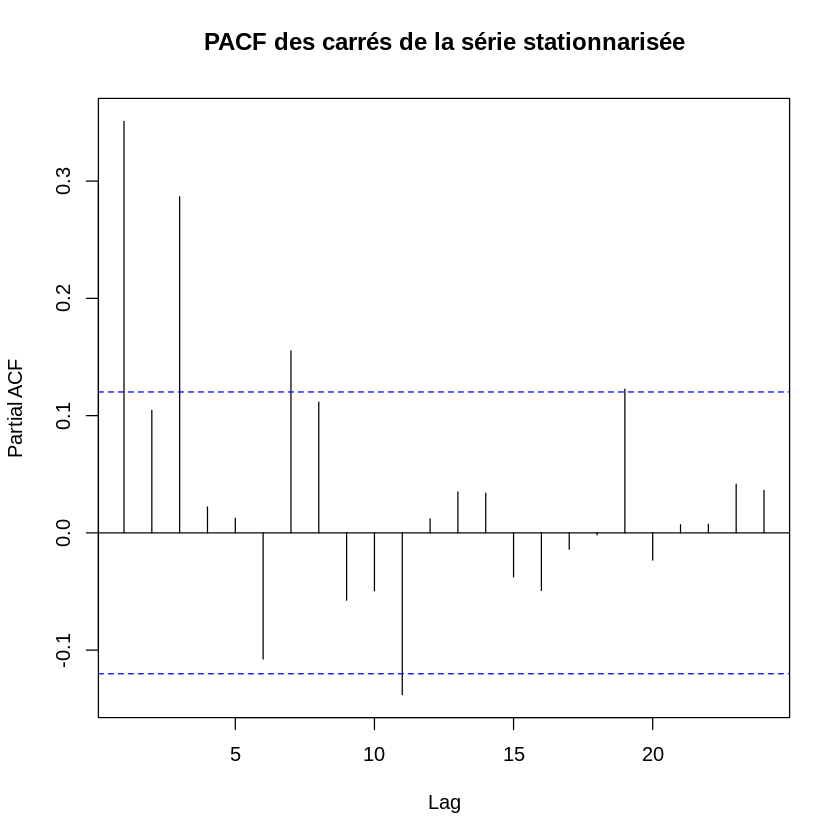

In [ ]:
pacf(na.omit(diff_series_MP^2),main = "PACF des carrés de la série stationnarisée")

Comme on peut le voir ici les 3 premiers lag sont significatifs.

On teste l'hypothèse d'absence d'effet ARCH avec quatre retards. La régression estimée est :


Les hypothèses du test sont :


\begin{cases}
H_0 : \gamma_1 = \dots = \gamma_4 = 0 \implies \text{pas d'effet ARCH} \\
H_a : \gamma_1 \neq 0 \ \text{ou} \ \dots \ \gamma_4 \neq 0 \implies \text{effet ARCH}
\end{cases}


Les résultats du test d'absence d'effet ARCH figurent ci-dessous :

In [ ]:
ArchTest(diff_series_MP,lags=4,demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  diff_series_MP
Chi-squared = 53.504, df = 4, p-value = 6.685e-11


La statistique de test est ARCH_LM = 53,504 est supérieure aux seuils critiques : on rejette l'hypothèse nulle d'absence d'effet ARCH pour les résidus pour les risques de première espèce habituels (1\%, 5\% et 10\%).
La probabilité critique est égale à $6.685e-11$ : on rejette l'hypothèse nulle d'absence d'effet ARCH.


Les résultats du test montrent que l'hypothèse nulle d'absence d'effet ARCH est rejetée, indiquant ainsi la présence d'une hétéroscédasticité conditionnelle dans les résidus. En d'autres termes, la variance des résidus n'est pas constante, mais dépend des valeurs passées des résidus au carré. Cette caractéristique suggère que le modèle initial ne capture pas pleinement les propriétés dynamiques des données. Par conséquent, il devient pertinent d'estimer un modèle adapté, tel qu'un modèle ARCH (Autoregressive Conditional Heteroskedasticity) ou GARCH (Generalized ARCH), pour modéliser ces variations conditionnelles de la volatilité. Ces modèles permettent d'améliorer les prévisions et de mieux comprendre les fluctuations de la variance au fil du temps. Une fois le modèle ajusté, il sera essentiel de réévaluer les résidus pour s'assurer que l'effet ARCH a été correctement pris en compte.


### Conclusion


En conclusion, les tests réalisés sur les résidus ont révélé plusieurs points importants. Tout d'abord, l'autocorrélation présente dans les résidus a été confirmée par le test de Ljung-Box, ce qui suggère que les résidus ne sont pas indépendants et qu'il existe une structure d'autocorrélation non capturée par le modèle. Ensuite, l'analyse de la normalité des résidus, à travers des tests tels que celui de Jarque-Bera, montre que les résidus ne suivent pas une loi normale, ce qui indique que les hypothèses classiques de normalité ne sont pas satisfaites. Enfin, les résultats du test ARCH ont conduit au rejet de l'hypothèse nulle d'absence d'effet ARCH, suggérant ainsi la présence d'une hétéroscédasticité conditionnelle dans les résidus. Ces résultats mettent en évidence la nécessité d'adapter le modèle aux spécificités des données, notamment en prenant en compte l'autocorrélation, l'absence de normalité et l'effet ARCH. Cela pourrait nécessiter l'estimation de modèles plus sophistiqués, tels que les modèles GARCH, pour mieux capturer la dynamique des résidus.

Les résultats des tests effectués sur les résidus sont surprenants, bien qu'un bruit blanc ait été supposé. En effet, le test de Ljung-Box montre une autocorrélation significative des résidus, ce qui contredit l'hypothèse d'absence d'autocorrélation d'un bruit blanc. De plus, les tests de normalité révèlent que les résidus ne suivent pas une loi normale, et le test ARCH indique une hétéroscédasticité conditionnelle, ce qui suggère que la variance des erreurs dépend des valeurs passées. Ces anomalies suggèrent que le modèle initial, censé représenter un bruit blanc, est inadéquat et ne capture pas correctement la dynamique des données.

# Question 5 : Prévision

On calcule les prévisions à l'horizon h=3 ainsi que leur intervalle de confinance à 95 %

    Point Forecast    Lo 95    Hi 95
265       104.8392 95.29439 114.3840
266       104.8392 91.33419 118.3442
267       104.8392 88.29036 121.3881

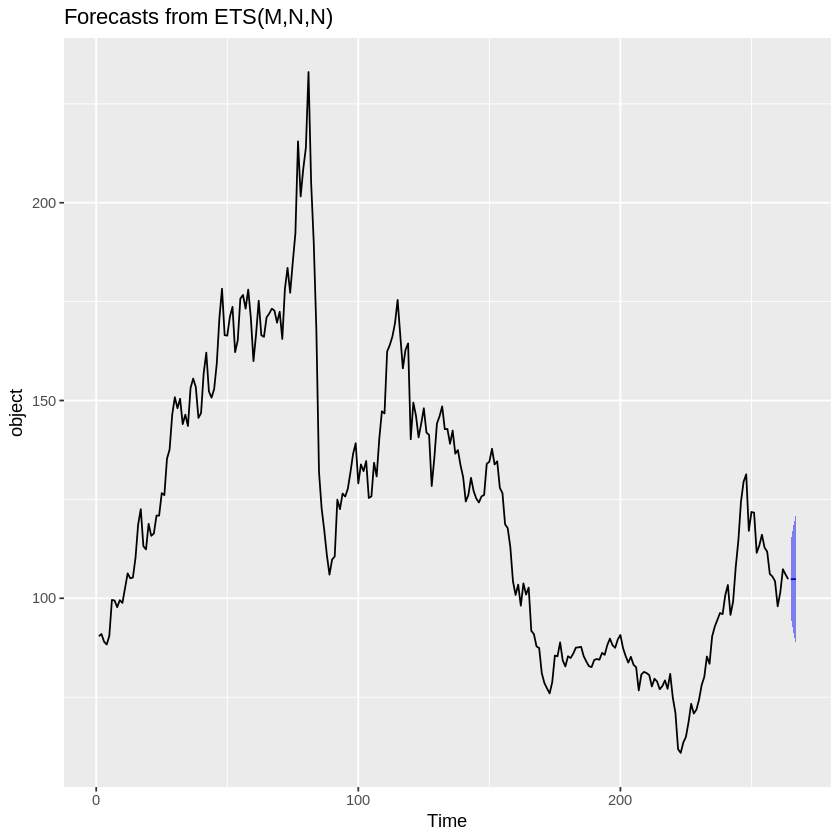

In [ ]:
forecast_diff_MP<-forecast(df$matière_première[1:(length(df$matière_première) - 3)],h=3,level=95)
forecast_diff_MP
autoplot(forecast_diff_MP)

Le modèle explique bien l'évolution future du prix des matières première par rapport à ses valeurs observées.

Dans le cadre de ce projet, nous avons modélisé la série des matières premières à l'aide d'un modèle ARMA qui, après estimation, s'est avéré être un bruit blanc. Un modèle de bruit blanc est un processus stochastique dont les résidus sont indépendants et identiquement distribués avec une moyenne nulle et une variance constante. En d'autres termes, il n'y a pas de dépendance temporelle ou de structure dans les résidus, ce qui signifie qu'il n'y a pas de pattern identifiable à prédire à partir de la série elle-même.

Puisque le modèle est un bruit blanc, les prévisions futures ne dépendent pas des valeurs passées ou de toute dynamique dans la série. Les prévisions  de variation sont simplement basées sur la moyenne des résidus, qui est nulle pour un bruit blanc idéal. Cela signifie que les prévisions  de variation pour les horizons 1, 2 et 3 seront toutes égales à la moyenne des résidus, soit zéro.

C'est à dire que dans le cadre d'un bruit blanc la meilleure prevision possible en t+1 est la meme valeur qu'en t.



Affichage des valeurs observées et des valeurs prédites.

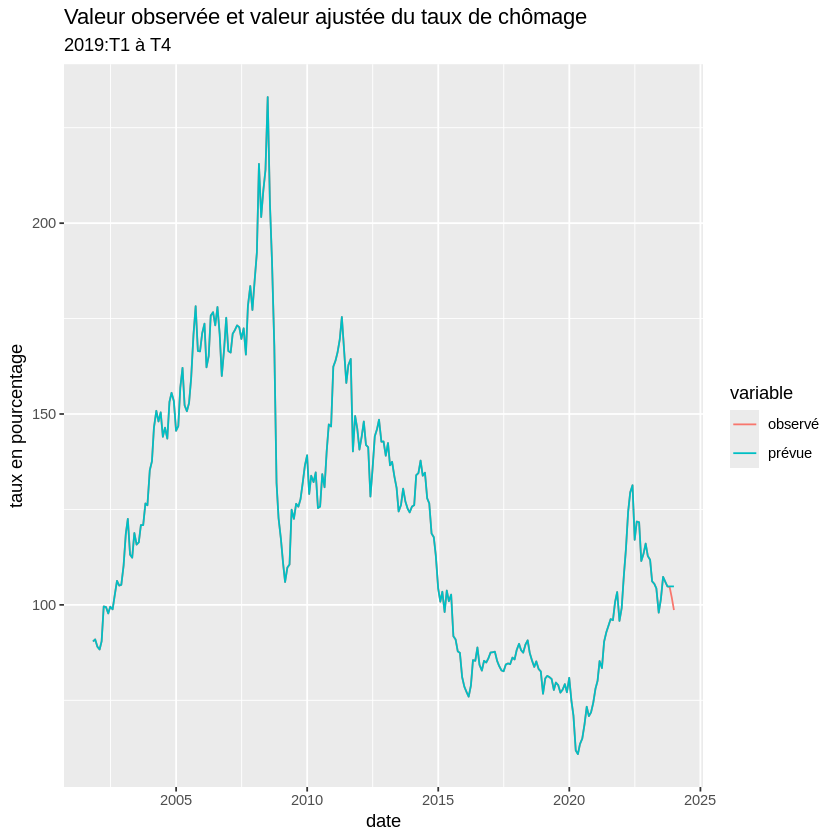

In [ ]:
df_forc<-cbind.data.frame(df$Dates,df$matière_première,c(df$matière_première[1:264],as.matrix(forecast_diff_MP$mean)))
colnames(df_forc)<-c("date","observé","prévue")
data_F_melt=melt(as.data.frame(df_forc),id.vars = 1)
p_g_us<-ggplot(data=data_F_melt,aes(x=date))+geom_line(aes(x=date,y=value,color= variable))
p_g_us+labs(y="taux en pourcentage",title = "Valeur observée et valeur ajustée du taux de chômage",
            subtitle = "2019:T1 à T4")

# Question 6 : Estimation du modèle VAR

### Mise en forme des données

Nous utilisons un modèle VAR (Vector AutoRegressive) pour analyser les interactions dynamiques entre les prix des matières premières et la performance de l'indice financier du S&P 500.

L'étude se décompose en plusieurs étapes :
1. L'estimation du modèle VAR.
2. Les tests de causalité au sens de Granger pour identifier les relations directionnelles entre les variables.
3. L'analyse des fonctions d'impulsion-réponse afin de comprendre les effets d'un choc sur une variable sur l'autre.
4. La prévision des valeurs futures.

En complément, nous examinerons l'impact de la période Covid-19 sur les résultats, en discutant des ajustements nécessaires pour tenir compte des spécificités de cette période exceptionnelle.


In [ ]:
start_date <- as.Date("2001-10-31")
n <- length(diff_series_MP)
dates_MP <- seq.Date(from = start_date, by = "month", length.out = n)
df_MP <- data.frame(date = dates_MP, MP = diff_series_MP)

n_SNP500_FI <- length(diff_series_SNP_FI)
dates_SNP500_FI <- seq.Date(from = start_date, by = "month", length.out = n_SNP500_FI)
df_SNP500_FI <- data.frame(date = dates_SNP500_FI, FI = diff_series_SNP_FI)

n_SNP500_Tech <- length(diff_series_SNP_Tech)
dates_SNP500_Tech <- seq.Date(from = start_date, by = "month", length.out = n_SNP500_Tech)
df_SNP500_Tech <- data.frame(date = dates_SNP500_Tech, Tech = diff_series_SNP_Tech)

n_SNP500_RL <- length(diff_series_SNP_RL)
dates_SNP5OO_RL <- seq.Date(from = start_date, by = "month", length.out = n)
df_SNP500_RL <- data.frame(date = dates_SNP5OO_RL, RE = diff_series_SNP_RL)

df_merge <- merge(df_MP, df_SNP500_FI,by = "date")
df_merge<- merge(df_merge, df_SNP500_Tech,by = "date")
df_merge<- merge(df_merge, df_SNP500_RL,by = "date")

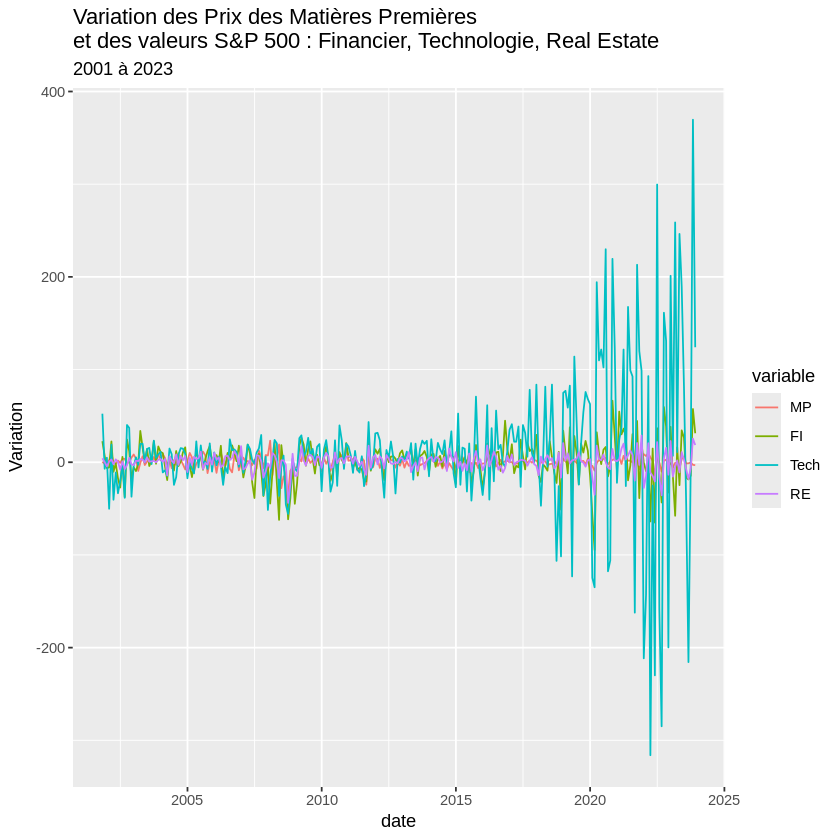

In [ ]:
data_melt=melt(as.data.frame(df_merge),id.vars = 1)
p_us_T<-ggplot(data=data_melt,aes(x=date))+geom_line(aes(x=date,y=value,color=variable))
p_us_T + labs(
  y = "Variation",
  title = "Variation des Prix des Matières Premières\net des valeurs S&P 500 : Financier, Technologie, Real Estate",
  subtitle = "2001 à 2023"
)

Le graphique ci-dessous illustre l'évolution des 4 séries. Celles-ci présentent des dynamiques similaires, bien que l'indice financier du Tech affiche une volatilité beaucoup plus élevée et des amplitudes de variation plus importantes que les autres.

Les années 2008 et 2009 sont marquées par une chute significative des quatres séries. Par la suite, les quatres séries retrouve un certain équilibre jusqu'au début de la pandémie de Covid-19 en 2020. À ce moment, les indices retrouvent beaucoup de volatilité.

En raison de la spécificité de la période du covid, on se limite dans un premier temps à la période 2001 à 2020.


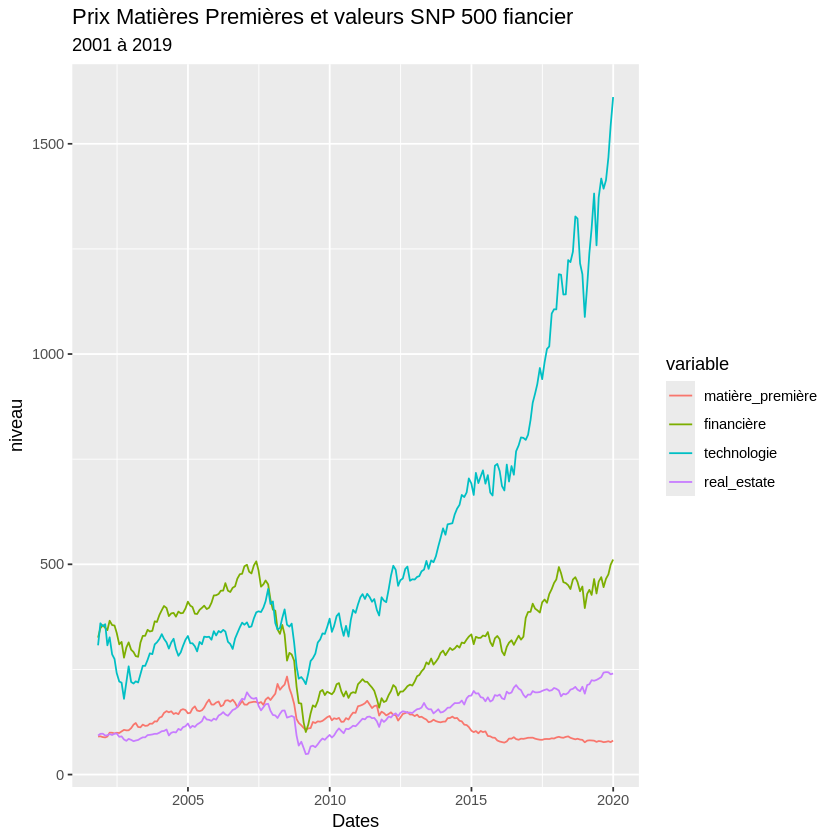

In [ ]:
# Extraction des lignes dont les dates sont entre "2001-01-01" et "2020-01-01"
df_short <- df[df$Dates >= as.Date("2001-01-01") & df$Dates < as.Date("2020-01-01"), ]

data_melt=melt(as.data.frame(df_short),id.vars = 1)

p_us<-ggplot(data=data_melt,aes(x=Dates))+geom_line(aes(x=Dates,y=value,color=variable))
p_us+labs(y="niveau",title = "Prix Matières Premières et valeurs SNP 500 fiancier",
          subtitle = "2001 à 2019")


diff_series_MP_truncated <- diff_series_MP[1:219]
diff_series_SNP_FI_truncated <- diff_series_SNP_FI[1:219]
diff_series_SNP_Tech_truncated <- diff_series_SNP_Tech[1:219]
diff_series_SNP_RE_truncated <- diff_series_SNP_RL[1:219]


###Taux de croissance du prix des matières premières et de la valeur du SNP500 financier

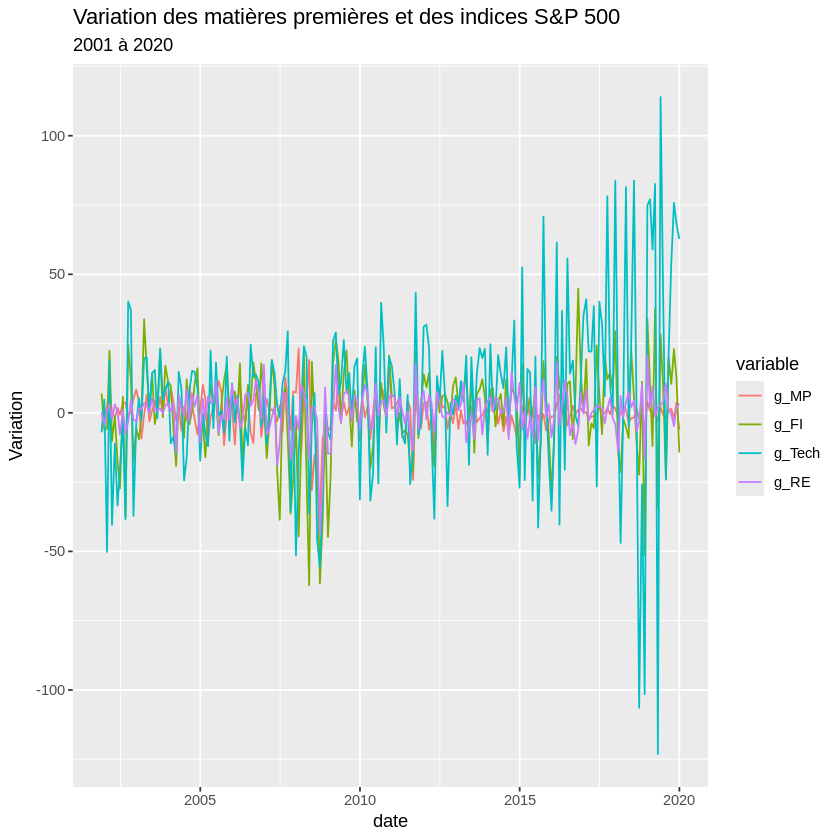

In [ ]:
df_g_short <- data.frame(
  date = df_short$Dates[-1],  # 219 dates (déjà ajustées)
  g_MP = diff_series_MP_truncated[-1],
  g_FI = diff_series_SNP_FI_truncated[-1],
  g_Tech = diff_series_SNP_Tech_truncated[-1],  # Ajout de la virgule ici
  g_RE = diff_series_SNP_RE_truncated[-1]
)


colnames(df_g_short) <- c("date", "g_MP", "g_FI","g_Tech","g_RE")# Renommer les colonnes si nécessaire

data_melt <- melt(as.data.frame(df_g_short), id.vars = "date") # Transformation en format long

p_g_us <- ggplot(data = data_melt, aes(x = date, y = value, color = variable)) +
  geom_line() +
  labs(
    y = "Variation",
    title = "Variation des matières premières et des indices S&P 500",
    subtitle = "2001 à 2020"
  )

# Afficher le graphique
p_g_us


Le graphique ci-dessous illustre l'évolution des 4 séries de taux de croissance. Celles-ci présentent des dynamiques similaires, bien que l'indice financier du Tech affiche une volatilité beaucoup plus élevée et des amplitudes de variation plus importantes que les autres.

Les années 2008 et 2009 sont marquées par une chute significative des quatres séries. Par la suite, les quatres séries retrouve un certain équilibre jusqu'au début de la pandémie de Covid-19 en 2020. À ce moment, les indices retrouvent beaucoup de volatilité.

In [ ]:
summary(df_g_short[c("g_MP", "g_FI","g_Tech","g_RE")])
sapply(df_g_short[c("g_MP", "g_FI","g_Tech","g_RE")], sd, na.rm = TRUE)

      g_MP                g_FI              g_Tech              g_RE        
 Min.   :-35.80350   Min.   :-62.1800   Min.   :-123.160   Min.   :-43.810  
 1st Qu.: -2.86655   1st Qu.: -7.9975   1st Qu.:  -9.328   1st Qu.: -2.958  
 Median :  0.17025   Median :  3.1450   Median :   6.050   Median :  1.385  
 Mean   : -0.07395   Mean   :  0.6829   Mean   :   6.028   Mean   :  0.673  
 3rd Qu.:  3.49697   3rd Qu.: 11.1275   3rd Qu.:  20.282   3rd Qu.:  5.340  
 Max.   : 23.23470   Max.   : 44.7900   Max.   : 113.960   Max.   : 20.620  

g_MP      g_FI    g_Tech      g_RE 
 6.799260 16.687452 31.111786  7.620333

Les statistiques descriptives révèlent des différences significatives entre les moyennes des quatres taux de croissance. Le taux de croissance de l'indice Tech présente une variabilité nettement plus élevée que celle des autres, comme en témoignent les écarts types, ainsi que les valeurs maximales et minimales.

In [ ]:
# Test de corrélation entre g_MP et g__FI
cor_test_result <- cor.test(df_g_short$g_MP, df_g_short$g_FI, use = "complete.obs")
print(cor_test_result)


	Pearson's product-moment correlation

data:  df_g_short$g_MP and df_g_short$g_FI
t = 2.2101, df = 216, p-value = 0.02815
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.0161465 0.2761272
sample estimates:
      cor 
0.1487054 



La corrélation entre les deux taux de croissance est de 0,1455 et est significative, car la p-value associée est inférieure à 0,05. Cela indique que la corrélation est significativement différente de zéro au seuil de 5 %.

Pour l'analyse des fonctions ACF et PACF, nous avons décidé de remplacer la seule valeur manquante de la série par la moyenne des observations non manquantes.


Mettre à jour directement la série dans df_g_short
Calculer l'ACF avec la version actualisée de la série.

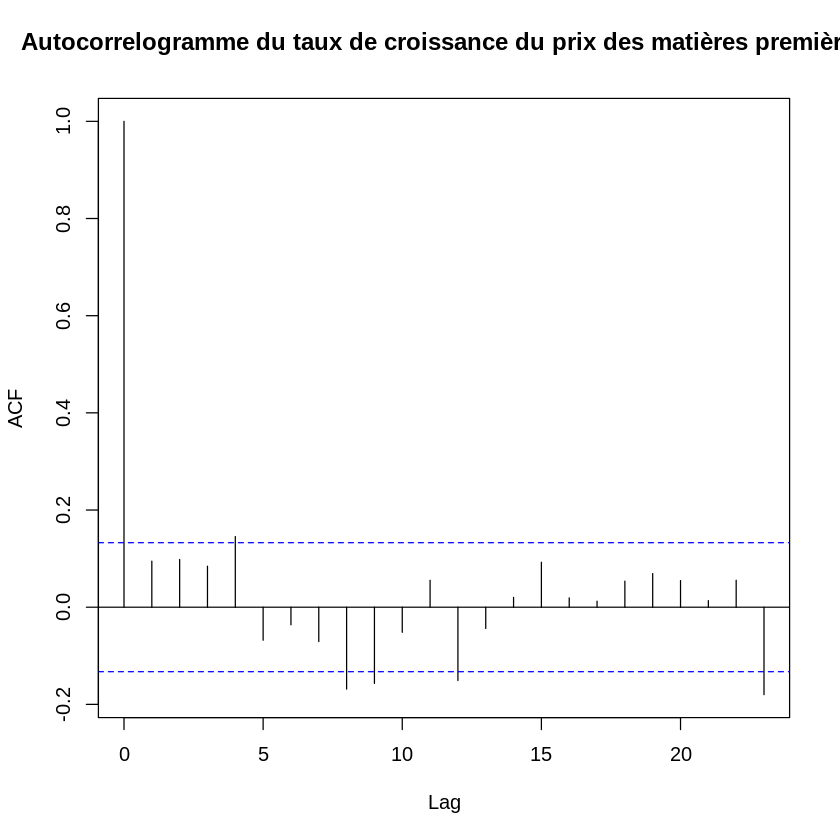

In [ ]:
df_g_short$g_MP[is.na(df_g_short$g_MP)] <- mean(df_g_short$g_MP, na.rm = TRUE)
acf(df_g_short$g_MP, main = "Autocorrelogramme du taux de croissance du prix des matières premières")


L'autocorrelogramme ne révèle aucun retard significatif, à l'exception du lag 0.

Mettre à jour directement la série dans df_g_short et recalculer l'ACF avec la version actualisée de la série.

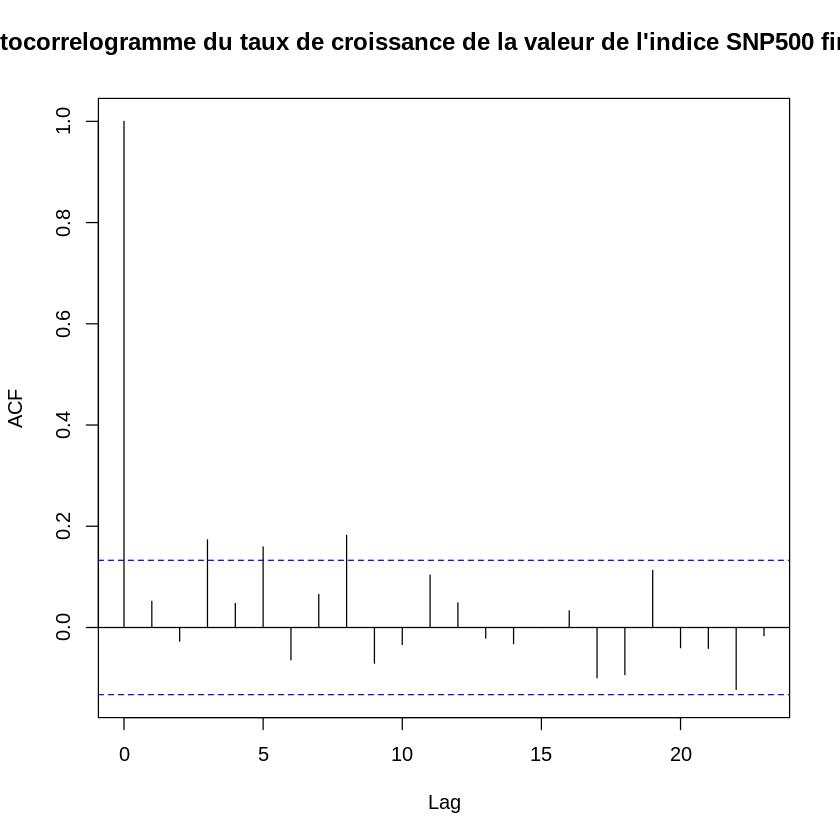

In [ ]:
df_g_short$g_FI[is.na(df_g_short$g_FI)] <- mean(df_g_short$g_FI, na.rm = TRUE)
acf(df_g_short$g_FI, main = "Autocorrelogramme du taux de croissance de la valeur de l'indice SNP500 financier")



L'autocorrelogramme du taux de croissance de la valeur de l'indice financier S&P 500 ne montre aucun retard significatif, à l'exception du lag 0.

Voir annexes pour les autres acf et corrélation (résultat similaire).

### Modélisation VAR



Pour la modélisation VAR, nous déterminons le nombre optimal de retards à l'aide de critères d'information multivariés. Nous fixons un nombre maximum de retards à 24, ce qui correspond à deux années de recul pour des données mensuelles. Le modèle VAR est estimé sans constante ni tendance, conformément à l'hypothèse de bruit blanc mentionnée dans la question 4.

In [ ]:
pselect<-VARselect(y=df_g_short[,c(2,3,4,5)],lag.max=8,type=c("none"))
pselect$criteria # Affichage des valeurs des critère de sélection
pselect$selection # nombre de retards optimal selon les critères de sélection

,1,2,3,4,5,6,7,8
AIC(n),1.969663e+01,1.979752e+01,1.978731e+01,1.983401e+01,1.988494e+01,1.994705e+01,1.993703e+01,1.996336e+01
HQ(n),1.979973e+01,2.000371e+01,2.009659e+01,2.024639e+01,2.040041e+01,2.056562e+01,2.065869e+01,2.078811e+01
SC(n),1.995165e+01,2.030755e+01,2.055236e+01,2.085408e+01,2.116003e+01,2.147716e+01,2.172215e+01,2.200350e+01
FPE(n),3.582180e+08,3.962929e+08,3.924067e+08,4.114495e+08,4.334377e+08,4.619950e+08,4.584757e+08,4.722057e+08


AIC(n)  HQ(n)  SC(n) FPE(n) 
     1      1      1      1

Le nombre optimal de retards selon tous les critères est 1.


Estimation d'un modèle VAR(1)

In [ ]:
var.1lag <-VAR(y = df_g_short[,c("g_MP", "g_FI","g_Tech","g_RE")],type="none",lag.max = 1)
summary(var.1lag)


VAR Estimation Results:
Endogenous variables: g_MP, g_FI, g_Tech, g_RE 
Deterministic variables: none 
Sample size: 217 
Log Likelihood: -3345.633 
Roots of the characteristic polynomial:
0.1453 0.1071 0.05724 0.003324
Call:
VAR(y = df_g_short[, c("g_MP", "g_FI", "g_Tech", "g_RE")], type = "none", 
    lag.max = 1)


Estimation results for equation g_MP: 
g_MP = g_MP.l1 + g_FI.l1 + g_Tech.l1 + g_RE.l1 

          Estimate Std. Error t value Pr(>|t|)  
g_MP.l1    0.08793    0.06953   1.265   0.2074  
g_FI.l1    0.08326    0.03870   2.152   0.0326 *
g_Tech.l1 -0.03572    0.01853  -1.927   0.0553 .
g_RE.l1    0.03564    0.07336   0.486   0.6276  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 6.715 on 213 degrees of freedom
Multiple R-Squared: 0.04235,	Adjusted R-squared: 0.02437 
F-statistic: 2.355 on 4 and 213 DF,  p-value: 0.05491 


Estimation results for equation g_FI: 
g_FI = g_MP.l1 + g_FI.l1 + g_Tech.l1 + g_RE.l1 

          Estimate

g_MP.li, g_FI.li, g_Tech.li et g_RE.li représentent respectivement les séries g_MP, g_FI,g_Tech et g_RE avec un retard de i périodes.


Equation du taux de croissance g_MP : le seul coefficient significatif à 5% est g_FI.l1 ceux qui veut dire qu'une accélération de la croissance de l'indice financier a pour effet d'accélérer la croissance des matières premières.

Equation du taux de croissance g_Fi : aucun coefficient de significatif à 5%.

Equation du taux de croissance g_Tech :  aucun coefficient de significatif à 5%.

Equation du taux de croissance g_RE : aucun coefficient de significatif à 5%.


On remarque que tous les R-Squared sont très faibles le plus important étant celui de l'equation du taux de croissance g_Fi = 4.2% (quand même très faibles)


Afin d'étudier la stationnarité du modèle VAR, nous utilisons la fonction roots. Cette fonction renvoie les modules des inverses des racines du polynôme caractéristique, permettant ainsi de vérifier si toutes les racines sont situées à l'extérieur du cercle unité, condition nécessaire à la stationnarité du modèle.

In [ ]:
roots(var.1lag)

[1] 0.145334010 0.107053600 0.057235042 0.003324222

Les inverses des racines ont un module strictement inférieur à 1, ce qui indique que la condition de stationnarité est satisfaite.

Affichage de résultats

Exemple 1 : Liste des matrices des coefficients estimés du VAR

In [ ]:
A<-Acoef(var.1lag)
A

,g_MP.l1,g_FI.l1,g_Tech.l1,g_RE.l1
g_MP,0.08792925,0.08326006,-0.03572167,0.03564364
g_FI,0.02261105,0.04977498,-0.03061780,0.14694565
g_Tech,-0.04996208,-0.01996417,0.01570958,0.32383472
g_RE,0.10061864,0.06520798,-0.02042524,-0.06122258


Exemple 2 : Variable ajustée du taux de croissance du revenu g_MP

Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”


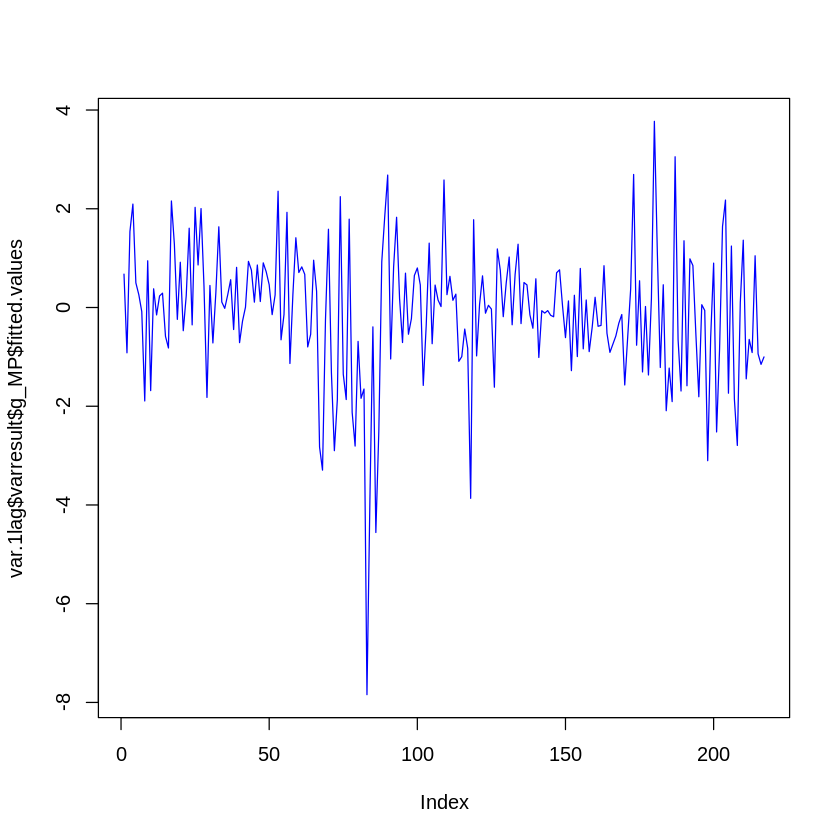

In [ ]:
plot(var.1lag$varresult$g_MP$fitted.values, type = "line", col = "blue")

#Question 7 :  causalité


###Test de causalité au sens de Granger

Nous testons si le prix des matières premières "cause" les autres variables au sens de Granger.

In [ ]:
causality(var.1lag,cause=c('g_MP'))

$Granger

	Granger causality H0: g_MP do not Granger-cause g_FI g_Tech g_RE

data:  VAR object var.1lag
F-Test = 0.75843, df1 = 3, df2 = 852, p-value = 0.5176


$Instant

	H0: No instantaneous causality between: g_MP and g_FI g_Tech g_RE

data:  VAR object var.1lag
Chi-squared = 11.682, df = 3, p-value = 0.008557



Les seuils critiques sont tirés d'une loi F(1, +\infty) :


\begin{array}{|c|c|c|}
\hline
\alpha & 5\% & 10\% \\
\hline
f_{1-\alpha}(1, +\infty) & 2.99 & 4.60 \\
\hline
\end{array}

La statistique de test, égale à 0.75843, est inférieure au seuil critique pour alpha = 5%. On ne rejette donc pas l'hypothèse nulle d'absence de causalité du prix des matières premières sur les autres indices. La probabilité critique du test est égale à 0,5176 ce qui est largement supérieur aux seuils courants (0,01 ou 0,05), conduisant aux mêmes conclusions. Cela signifie que les données ne fournissent pas de preuve suffisante pour conclure que g_MP cause les autres au sens de Granger.




On a donc qu'aucun indice cause les autres au sens de Granger. (voir annexes pour les autres)

#Question 8 : analyse impulsion-réponse


##Analyse impulsion réponse :  la methode des VAR


L'ordre des variables sera dans l'ordre décroisant de la statistique de test dans le test de causalité.


On calcule les fonctions impulsion-réponse :

In [ ]:
var.1lag <-VAR(y = df_g_short[,c( "g_FI","g_Tech","g_MP","g_RE")],type="none",lag.max = 1)

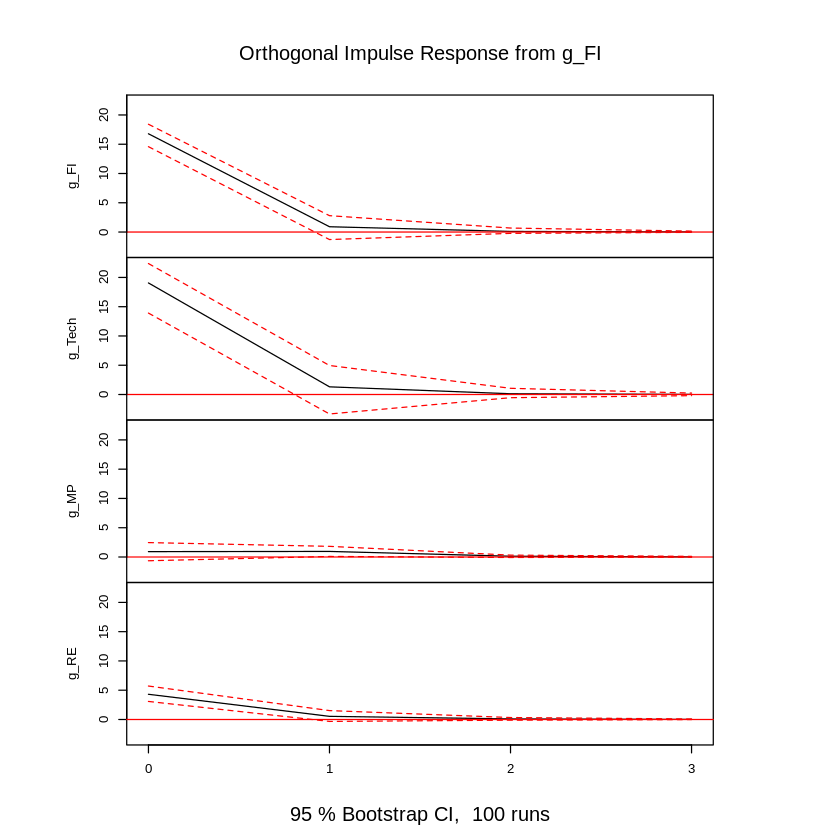

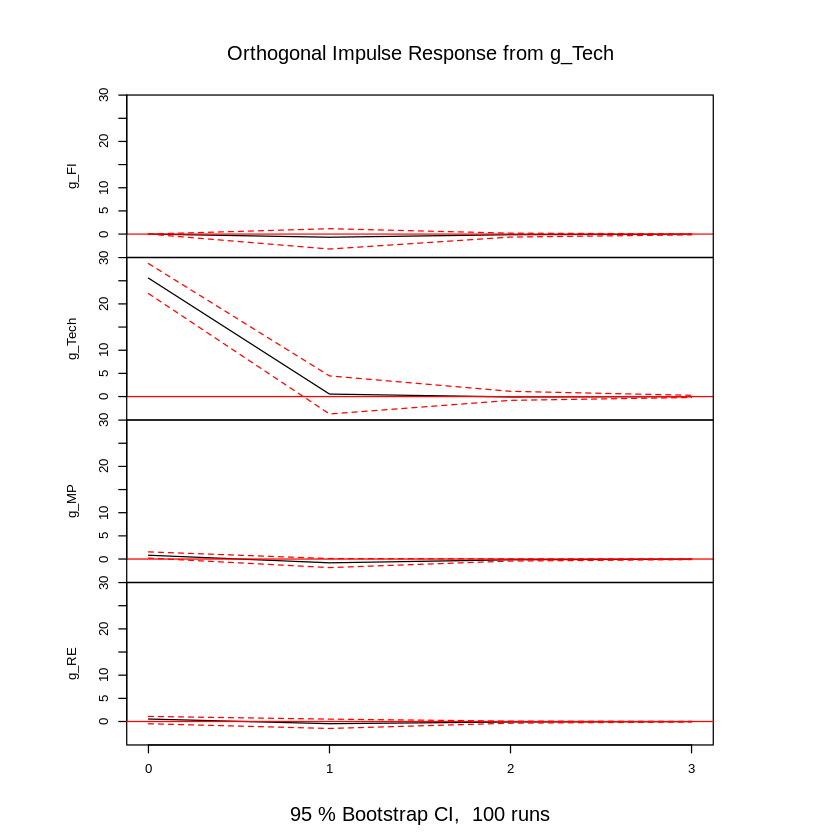

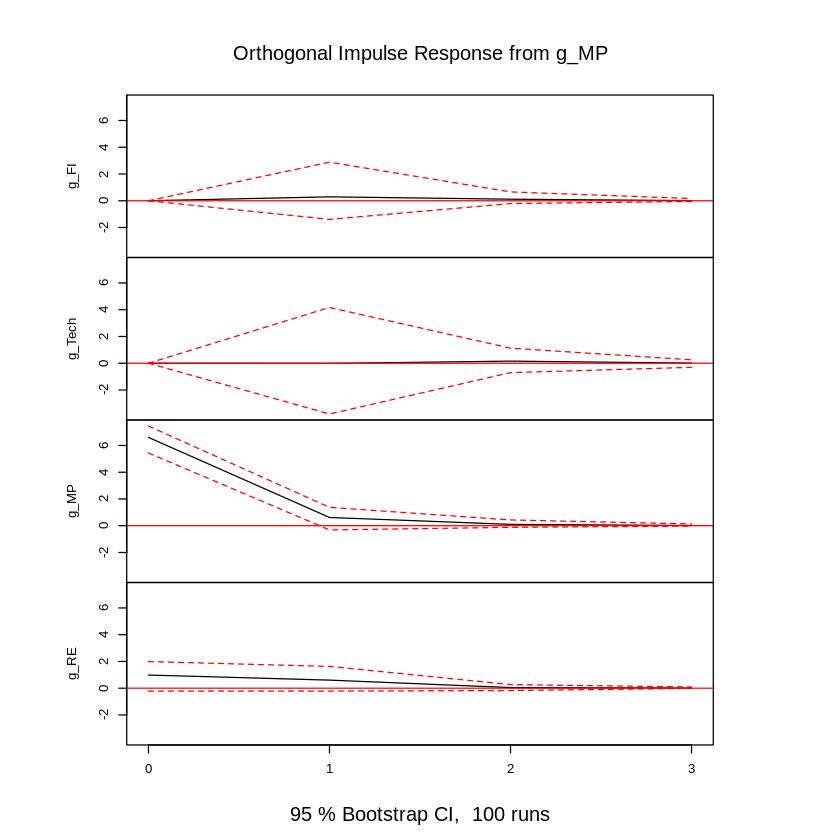

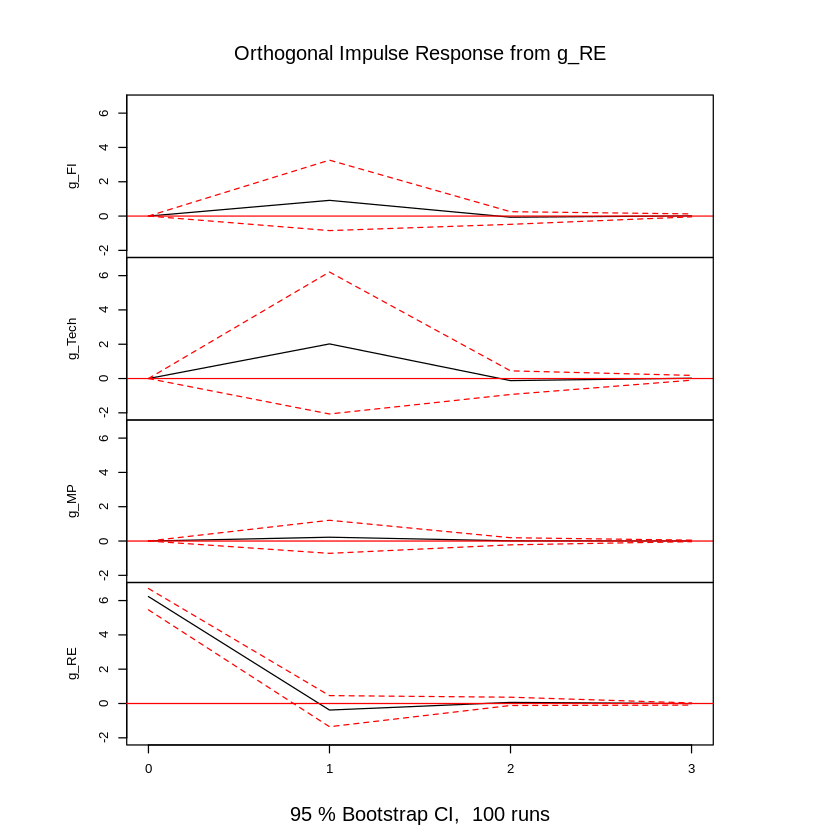

In [ ]:
irf<-irf(var.1lag,n.ahead = 3,ortho = TRUE,ci=0.95)
plot(irf)

Choc sur le secteur financier (g_FI) :
Un choc sur le taux de croissance du secteur financier entraîne un impact immédiat, positif et significatif sur le secteur technologique (g_Tech), avec une intensité similaire et limitée à environ un mois. Un effet plus modéré mais toujours positif est également observé sur le secteur immobilier (g_RE), bien que cet impact reste de faible amplitude et de courte durée.

Choc sur le secteur technologique (g_Tech) :
Un choc sur le taux de croissance du secteur technologique a très peu d’impact sur les autres secteurs. Les réponses des secteurs financier (g_FI), immobilier (g_RE) et des matières premières (g_MP) sont marginales, ce qui suggère une relative indépendance des variations technologiques par rapport aux autres secteurs économiques.

Choc sur les matières premières (g_MP) :
Les chocs sur les matières premières peuvent provoquer des variations significatives, à la fois positives et négatives, sur le secteur technologique (g_Tech), et des impacts plus modérés sur le secteur financier (g_FI). Un léger effet positif est également observé sur le secteur immobilier (g_RE). Les effets de ces chocs ont tendance à se dissiper après environ deux mois, avec un retour progressif à l'équilibre.

Choc sur le secteur immobilier (g_RE) :
Un choc sur le secteur immobilier entraîne un effet immédiat, positif et significatif sur les secteurs technologique (g_Tech) et financier (g_FI). Le secteur technologique, en particulier, montre un pic marqué dans les intervalles de confiance, avec des valeurs extrêmes traduisant une volatilité accrue. Le secteur financier, bien que moins sensible, subit également un impact notable mais de moindre amplitude.

Implications économiques :

Les résultats des réponses impulsionnelles (IRF) mettent en évidence des dynamiques économiques qui soulignent le rôle central du secteur financier dans l'interaction entre les secteurs économiques. Un choc sur le secteur financier affecte immédiatement et de manière significative les secteurs technologique et immobilier, confirmant que la finance agit comme un moteur essentiel des autres segments de l'économie. En revanche, un choc sur le secteur technologique a un impact négligeable sur les autres secteurs, ce qui reflète une certaine autonomie de la technologie dans son évolution et une dépendance limitée des autres secteurs à son égard. Les matières premières montrent une double dynamique : elles peuvent entraîner des fluctuations importantes, à la fois positives et négatives, dans le secteur technologique, et dans une moindre mesure dans le secteur financier, traduisant leur rôle comme source potentielle de volatilité et d'incertitude économique. Enfin, le secteur immobilier, bien qu'étroitement lié au secteur financier, exerce une influence significative mais plus localisée, avec un impact marqué sur le secteur technologique en cas de chocs. Ces résultats suggèrent que le secteur financier reste le pivot de l'interconnexion économique, tandis que le secteur technologique conserve un rôle relativement isolé, et que les matières premières agissent comme un amplificateur potentiel de chocs économiques.

##Estimation des IRF par les projections locales

On estime les IRF par la méthode des projections locales. On spécifie les paramètres suivants :

[[1]]
NULL


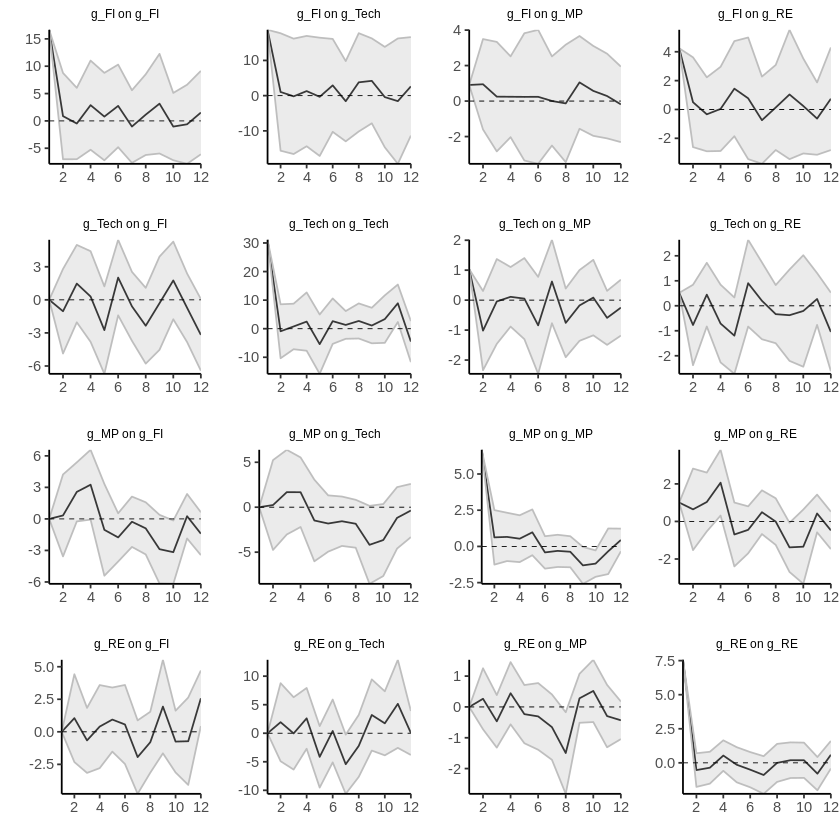

In [ ]:
irf_LP <-lp_lin(endog_data = df_g_short[, c(3,4,2,5)],
                    lags_endog_lin = NaN,
                    lags_criterion = 'BIC',
                    max_lags = 8,
                    trend = 0,
                    shock_type = 0,
                    confint=1.96,
                    hor=12,
                    adjust_se=TRUE)
plot(irf_LP)

Peu de différence avec les fonctions obtenues à partir du VAR, des chocs qui peuvent cepandant durer plus longtemps.

###Décomposition de la variance

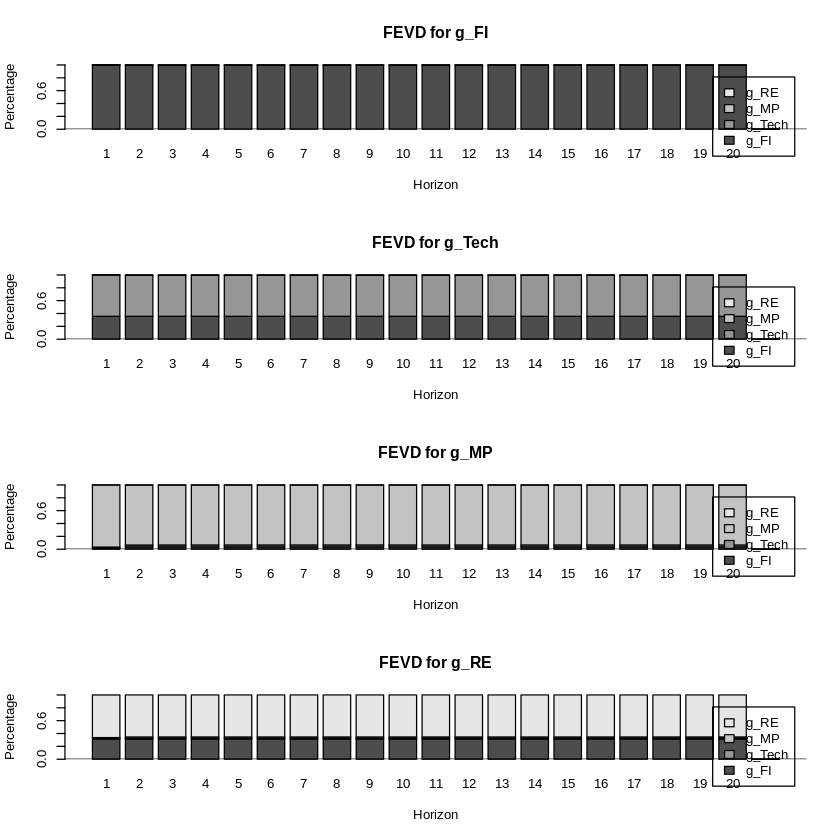

In [ ]:
dec_var <-fevd(var.1lag,n.ahead=20)

plot(dec_var)

La décomposition de la variance des erreurs de prévision indique que les contributions des chocs exogènes restent constantes sur l'horizon temporel étudié. Cela signifie que, quelle que soit la variable cible, la proportion de variance expliquée par les chocs d'une variable spécifique ne change pas significativement au fil des périodes.

Ce comportement peut suggérer une absence de transmission dynamique complexe entre les variables du modèle. En d'autres termes, les relations entre les variables ne présentent pas d'évolution marquée dans le temps, ce qui reflète peut-être un système où les dépendances structurelles sont simples ou faibles. Cette stabilité peut être due à :

- Un modèle mal spécifié ou simplifié.
- Une réelle absence d'interdépendance significative entre les variables à travers le temps.

Ce résultat mérite une analyse approfondie pour s'assurer que la structure du modèle VAR et le choix des variables capturent correctement les interactions dynamiques potentielles.

Variable g_FI (secteur financier) :
La variance des erreurs de prévision de g_FI est presque entièrement expliquée par ses propres chocs (100 %). Cela indique une forte inertie du secteur financier, avec une faible influence des chocs provenant des autres secteurs. Ce résultat est attendu pour un secteur central qui est souvent autosuffisant en termes de dynamique de court terme, reflétant un rôle dominant dans l'économie.

Variable g_Tech (secteur technologique) :
La variance des erreurs de prévision de g_Tech est expliquée à 60 % par ses propres chocs et à 40 % par les chocs provenant de g_FI. Cela souligne une forte interdépendance entre le secteur technologique et le secteur financier. Le secteur technologique semble dépendre en partie des conditions financières, ce qui est cohérent avec l'idée que le financement et les investissements en capital (souvent facilités par le secteur financier) sont cruciaux pour les entreprises technologiques.

Variable g_MP (matières premières) :
La variance des erreurs de prévision de g_MP est dominée par ses propres chocs (95 %), avec une contribution marginale de g_FI (6 %). Cela traduit une relative autonomie des matières premières, qui évoluent principalement en fonction de dynamiques spécifiques comme l'offre, la demande et les chocs géopolitiques. L'influence limitée de g_FI peut refléter un lien indirect entre les prix des matières premières et le secteur financier, potentiellement par le biais des marchés de matières premières ou de l'investissement.

Variable g_RE (secteur immobilier) :
La variance des erreurs de prévision de g_RE est expliquée à 60 % par ses propres chocs, à 35 % par g_FI et à 5 % par d'autres variables. Cela suggère que le secteur immobilier dépend fortement du secteur financier, probablement en raison du rôle clé de ce dernier dans le financement des prêts hypothécaires et des investissements immobiliers. L'autonomie partielle de g_RE (60 %) reflète également l'influence de facteurs spécifiques, comme les dynamiques locales de l'offre et de la demande dans le secteur immobilier.


# Question 9 :  Faites le test de cointégration de Johansen



##Test de cointégration de Johasen

In [ ]:
df_cointé<- df[,c('matière_première','financière','technologie', 'real_estate')] # on définit un dataframe qui contient les variables pour lesquelles on teste l'existence de la cointégration
pselect_cointé<-VARselect(y=na.omit(df_cointé),lag.max=12,type=c("const"))
pselect_cointé$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     1      1      1      1

Le nombre de retards optimal en fonction des critères est 1.

###Test de la trace

In [ ]:
df_cointé.vecm<-ca.jo(df_cointé,ecdet = "const",spec = "transitory",type = 'trace',K=2)
summary(df_cointé.vecm)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1]  7.792624e-02  3.487938e-02  2.013371e-02  7.587625e-03 -1.170938e-17

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 3 |  2.02  7.52  9.24 12.97
r <= 2 |  7.41 17.85 19.96 24.60
r <= 1 | 16.82 32.00 34.91 41.07
r = 0  | 38.32 49.65 53.12 60.16

Eigenvectors, normalised to first column:
(These are the cointegration relations)

                    matière_première.l1 financière.l1 technologie.l1
matière_première.l1          1.00000000     1.0000000     1.00000000
financière.l1               -0.07877845    -0.6128872     1.08579914
technologie.l1              -0.05289342     0.0228604    -0.09596851
real_estate.l1               0.66671905     1.7220344     0.47785259
constant                  -181.73603174  -184.8322828  -485.62058445
                    real_estat

Pour r=0 La statistique de test de la trace est égale à 38.32 ce qui est inférieur au seuil critique à 5% qui est égal à 53.12  donc on ne rejette pas l'hypothèse nulle qui dit que le rang est égal à 0.

On conclut qu'il n'existe pas de relation de cointégration entre les séries.


###Test de la valeur propre maximale

In [ ]:
df_cointé.vecm_eigen<-ca.jo(df_cointé,ecdet = "const",spec = "transitory",type = 'eigen',K=2)
summary(df_cointé.vecm_eigen)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1]  7.792624e-02  3.487938e-02  2.013371e-02  7.587625e-03 -1.170938e-17

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 3 |  2.02  7.52  9.24 12.97
r <= 2 |  5.39 13.75 15.67 20.20
r <= 1 |  9.41 19.77 22.00 26.81
r = 0  | 21.50 25.56 28.14 33.24

Eigenvectors, normalised to first column:
(These are the cointegration relations)

                    matière_première.l1 financière.l1 technologie.l1
matière_première.l1          1.00000000     1.0000000     1.00000000
financière.l1               -0.07877845    -0.6128872     1.08579914
technologie.l1              -0.05289342     0.0228604    -0.09596851
real_estate.l1               0.66671905     1.7220344     0.47785259
constant                  -181.73603174  -184.8322828  -485.62058445
    

Pour r=0 La statistique de test de la trace est égale à 21.2 ce qui est inférieur au seuil critique à 5% qui est égal à 28.14  donc on ne rejette pas l'hypothèse nulle qui dit que le rang est égal à 0.

On conclut qu'il n'existe pas de relation de cointégration entre les séries.


Cela est cohérent avec notre modèle VAR(1) car on a vu que les coefficient de nos variables ne sont pas significatif.
Il n'est donc pas nécessaire de faire une estimation EVCM car celle-ci nécessite une relation de cointégration.



#Conclusion


Notre analyse a révélé, à travers les tests sur les racines unitaires (tels que les tests Augmented Dickey-Fuller ou Phillips-Perron), que les séries initiales n'étaient pas stationnaires. Cela signifie que leurs moyennes et variances évoluent dans le temps, ce qui rend leur modélisation complexe dans leur état brut. Cependant, après avoir appliqué une différenciation première, nous avons observé que les séries devenaient stationnaires, satisfaisant ainsi les conditions nécessaires pour procéder à une analyse économétrique robuste. Cette transformation a permis de stabiliser la variance et d’éliminer les tendances à long terme, rendant les séries adaptées aux modèles dynamiques que nous avons estimés.



L'estimation du modèle ARMA a révélé qu'il satisfaisait les conditions de validité en produisant un processus qui s'apparente à un bruit blanc. En conséquence, la meilleure prévision pour xₜ était simplement xₜ₋₁	​
 , reflétant une dépendance directe et minimale entre les observations. Cependant, l'analyse approfondie des résidus de ce modèle a mis en évidence certaines limites. Nous avons détecté la présence d'une autocorrélation résiduelle, indiquant que le modèle n’a pas capturé l'intégralité de la dynamique des séries. De plus, la distribution des résidus n’était pas normale, et des tests supplémentaires ont suggéré la présence d’un effet ARCH (Autoregressive Conditional Heteroskedasticity), caractérisé par une variabilité conditionnelle des résidus. Ces observations ont souligné la nécessité de considérer des modèles plus complexes, comme les modèles GARCH, pour mieux capturer les comportements volatiles des séries étudiées.


L'analyse des séries et des rendements a montré que toutes les séries évoluent généralement de manière synchronisée, reflétant des dynamiques similaires sur les marchés. Cependant, le secteur technologique se distingue par des niveaux de volatilité particulièrement élevés. On remarque également des clusters de volatilité marqués lors de périodes de crises, notamment en 2008 (crise des Subprimes) et durant la pandémie de COVID-19, soulignant l'impact significatif des événements macroéconomiques sur ces séries.

L'analyse a révélé une légère corrélation positive entre les matières premières et les trois autres indices, à savoir le secteur technologique, financier et immobilier. Bien que les relations ne soient pas fortement marquées, elles suggèrent une interaction subtile, indiquant que les variations des prix des matières premières peuvent avoir un impact, même modéré, sur les rendements des secteurs financiers, technologiques et immobiliers.

Nous avons estimé le modèle VAR avec le nombre de retards optimal, qui a donné un modèle VAR(1). Après estimation, nous avons constaté qu'un nombre limité de coefficients étaient significatifs, avec une seule relation significative à 5% dans l'équation du taux de croissance g_MP. En effet, le seul coefficient significatif est g_fi.l1 indiquant qu'une accélération de la croissance de l'indice financier a pour effet d’accélérer la croissance des matières premières. Ce résultat suggère que les mouvements dans le secteur financier peuvent influencer positivement la dynamique de croissance des prix des matières premières à court terme. Cependant, aucune causalité de Granger n'a été trouvée entre les variables. Le nombre limité de variables significatives suggère qu'un modèle plus complexe qu'un VAR pourrait être mieux adapté pour capturer les dynamiques de ces séries financières.

Les réponses impulsionnelles (IRF) montrent que les chocs sur le secteur financier (g_FI) ont un impact immédiat et significatif sur le secteur technologique (g_Tech), mais de courte durée. Un choc sur le secteur technologique (g_Tech) a peu d'impact sur les autres secteurs, indiquant une certaine indépendance dans ce sens. Les chocs sur les matières premières (g_MP) provoquent des variations importantes, notamment sur le secteur technologique et, dans une moindre mesure, sur le secteur financier. Enfin, un choc sur le secteur immobilier (g_RE) a un effet notable sur les secteurs technologique et financier, avec une volatilité accrue dans le secteur technologique. Ces résultats soulignent que le secteur financier est central, tandis que le secteur technologique reste relativement isolé.

Les résultats suggèrent que le secteur financier joue un rôle clé dans l'interconnexion économique, influençant directement les secteurs technologique et immobilier, tandis que le secteur technologique évolue de manière plus autonome et que les matières premières agissent comme un amplificateur de volatilité économique.


En conclusion, l'analyse de la cointégration de Johansen n'a pas révélé l'existence d'une relation de cointégration entre les séries étudiées. En conséquence, un modèle VECM n'est pas approprié pour modéliser leurs dynamiques.







# Annexes


## Question 2

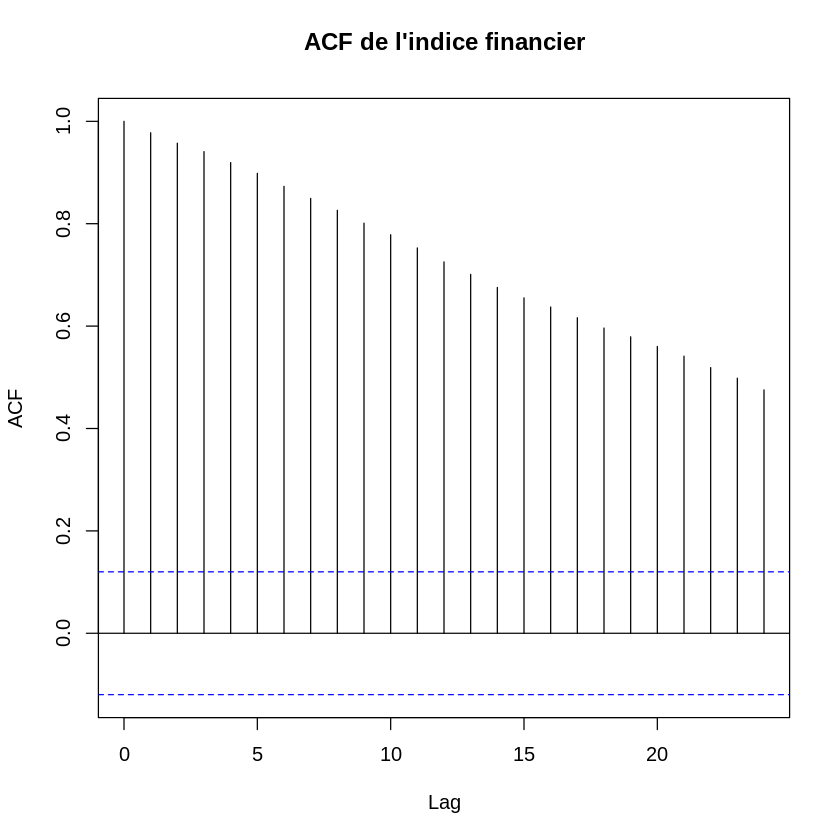

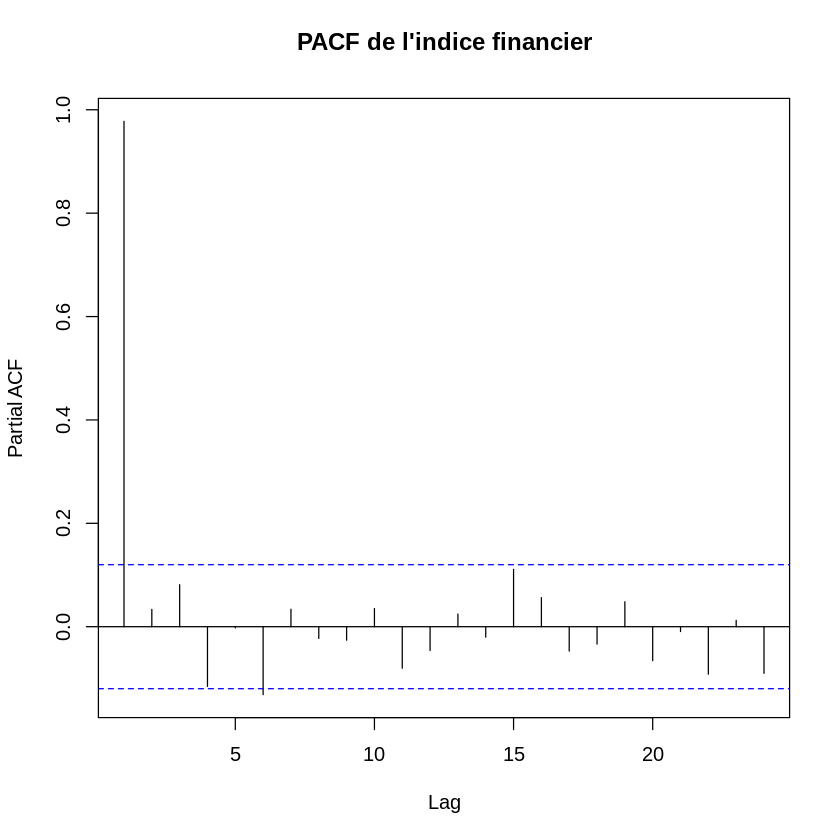

In [ ]:
# ACF et PACF pour l'indice financier
acf(df$financière, main = "ACF de l'indice financier")
pacf(df$financière, main = "PACF de l'indice financier")


Le déclin lent et progressif de l'ACF indique une dépendance à long terme, suggérant que la série est non stationnaire et nécessite une différenciation pour la stationnariser.

Le PACF suggère un processus AR(1) puisqu'il y a une coupure nette après le lag 1. Cela signifie que les valeurs futures de la série peuvent être bien modélisées en fonction de la valeur de la période immédiatement précédente.



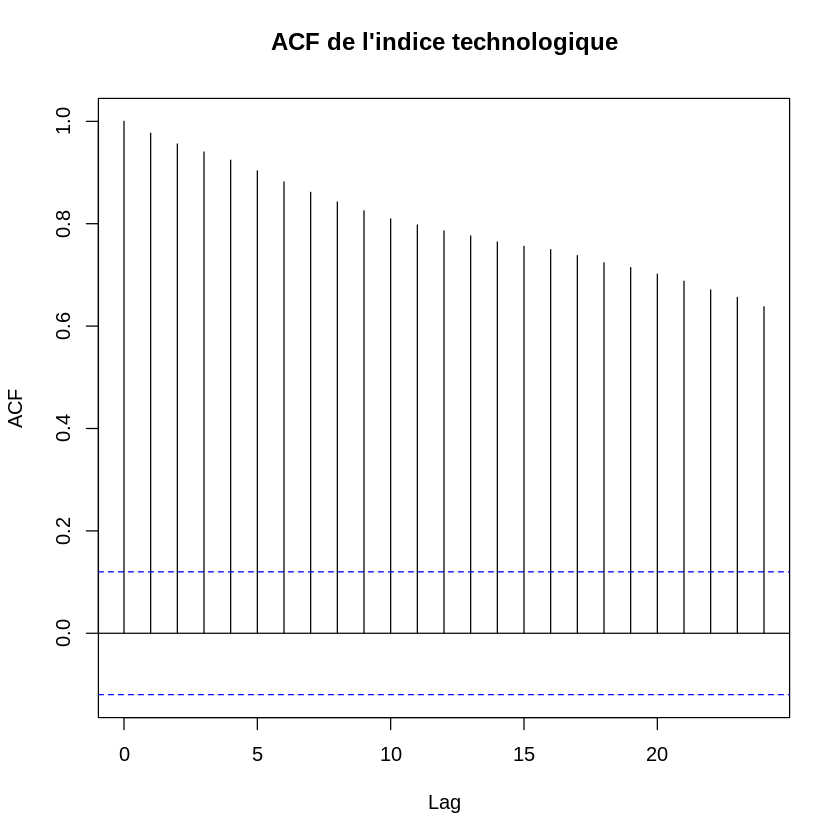

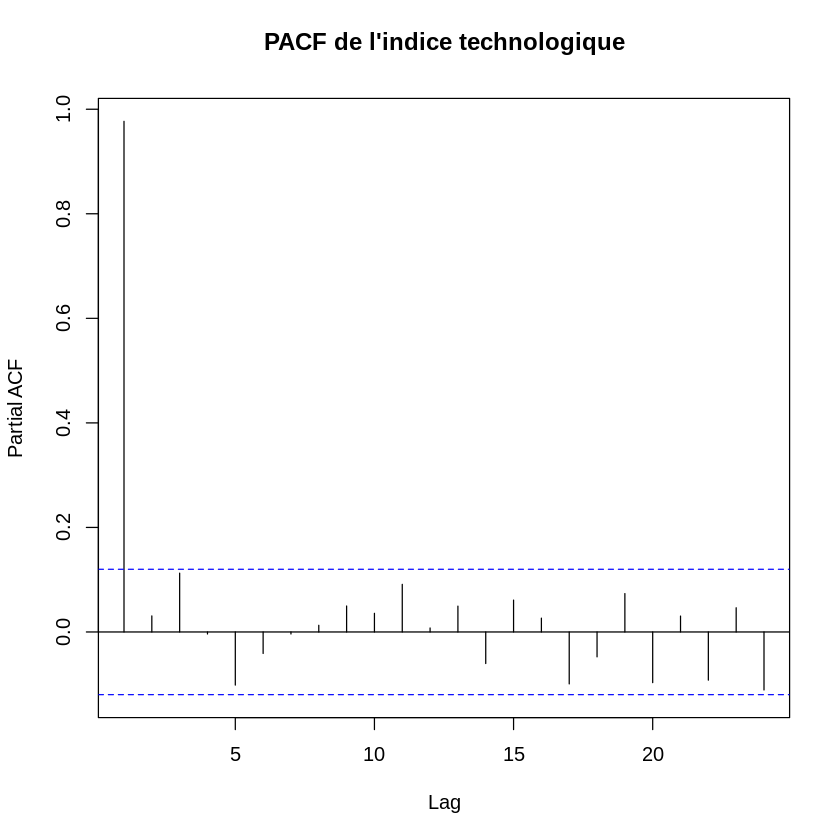

In [ ]:
# ACF et PACF pour l'indice technologique
acf(df$technologie, main = "ACF de l'indice technologique")
pacf(df$technologie, main = "PACF de l'indice technologique")



Le déclin lent et progressif de l'ACF indique une dépendance à long terme, suggérant que la série est non stationnaire et nécessite une différenciation pour la stationnariser.

Le PACF montre que l'influence des observations s'arrête au lag 2, ce qui confirme qu'un modèle AR(1) pourrait être approprié pour cette série.




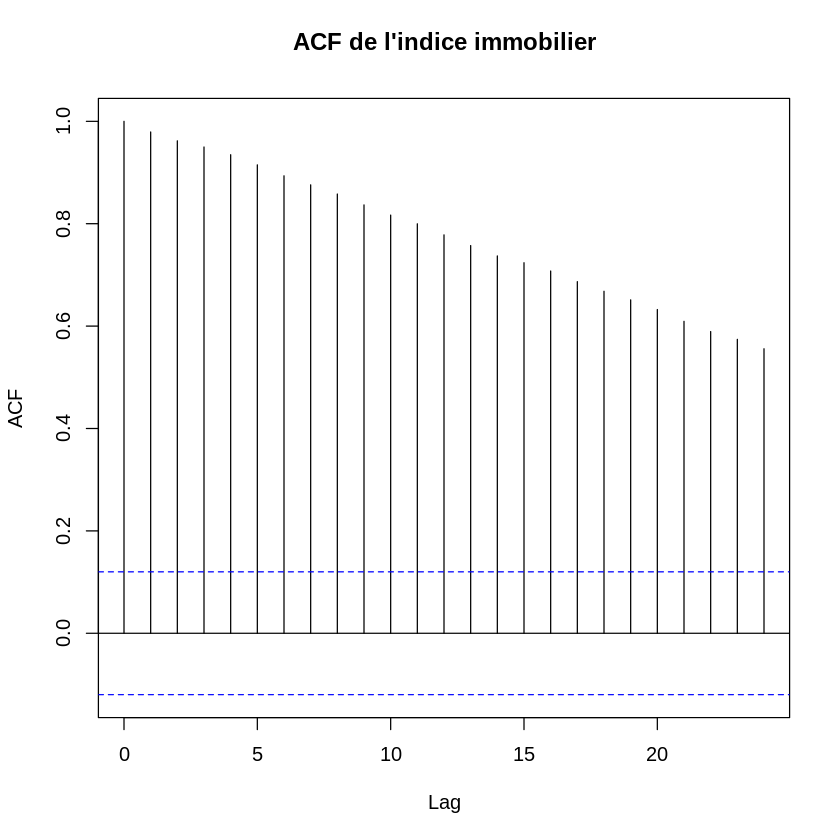

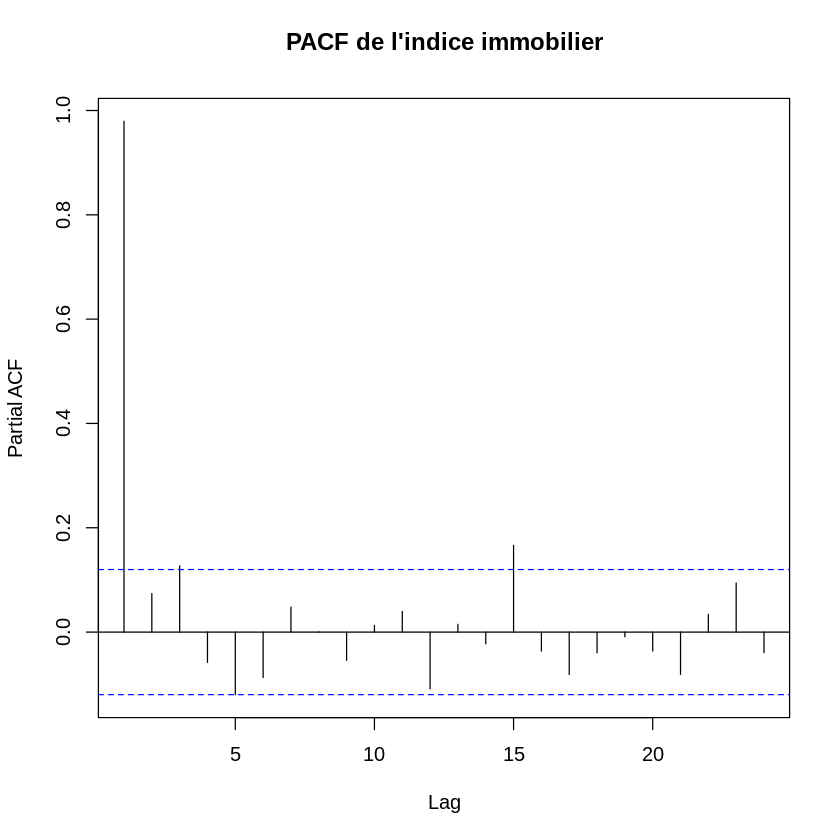

In [ ]:
# ACF et PACF pour l'indice immobilier
acf(df$real_estate, main = "ACF de l'indice immobilier")
pacf(df$real_estate, main = "PACF de l'indice immobilier")


Le déclin lent et progressif de l'ACF indique une dépendance à long terme, suggérant que la série est non stationnaire et nécessite une différenciation pour la stationnariser.

Le PACF suggère également un modèle AR(1) car la coupure nette après le lag 1 montre que seule l'autocorrélation partielle pour le premier lag est significative. Cela confirme que la série peut être modélisée avec un modèle autorégressif d'ordre 1.



## Question 3

###ADF

Test de Dickey-Fuller pour la série du S&P Financier




In [ ]:
#Test ADF avec la constante et la tendance deterministe*
adf_SNP_F1 <- ur.df(y = na.omit(df$financière),type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf_SNP_F1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
   Min     1Q Median     3Q    Max 
-97.82 -11.42   1.77  11.47  61.11 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  4.04318    4.22162   0.958   0.3391  
z.lag.1     -0.02073    0.01222  -1.696   0.0911 .
tt           0.03288    0.02037   1.614   0.1078  
z.diff.lag1  0.02961    0.06274   0.472   0.6373  
z.diff.lag2 -0.03230    0.06340  -0.509   0.6109  
z.diff.lag3  0.15745    0.06278   2.508   0.0128 *
z.diff.lag4 -0.05730    0.06357  -0.901   0.3682  
z.diff.lag5  0.14678    0.06390   2.297   0.0224 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.33 on 250 degrees of freedom
Multiple R-squared:  0.05849,	Adjusted R-squared:  0.03213 
F-statistic: 2.219 on 7 

La t-stat est égale à -1.6961 elle est supérieure à la valeurs critiques aux seuils de 5% qui est égale -3.42. On ne peut donc pas rejetter l'hypothèse nulle de non stationnarité.

Le t-stat de la tendance déterministe est égal à  1.614 et est inférieure à 3.14 le seuil de rejet à 5 %. On ne rejette pas l'hypothèse nulle que la tendance déterministe n'est pas significative. On passe au modèle avec une constante uniquement.


In [ ]:
#Test ADF avec la constante
adf_SNP_F2 <- ur.df(y = na.omit(df$financière),type=c("drift"), lag=8, selectlags = c('AIC'))
summary(adf_SNP_F2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-95.665 -10.589   1.452  11.078  63.875 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  5.13986    4.17987   1.230   0.2200  
z.lag.1     -0.01145    0.01082  -1.058   0.2910  
z.diff.lag1  0.03069    0.06294   0.488   0.6262  
z.diff.lag2 -0.03227    0.06361  -0.507   0.6123  
z.diff.lag3  0.15826    0.06298   2.513   0.0126 *
z.diff.lag4 -0.05848    0.06377  -0.917   0.3600  
z.diff.lag5  0.14693    0.06410   2.292   0.0227 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.39 on 251 degrees of freedom
Multiple R-squared:  0.04868,	Adjusted R-squared:  0.02594 
F-statistic: 2.141 on 6 and 251 DF,  p-value: 0.04939


Value of test-

Notre statistique de test vaut -1.0581 elle est donc supérieure à la valeur critique au seuil de 5% qui est égale à -2.87. Donc on ne peut pas rejetter l'hypothèse nulle de racine unitaire. La série est donc non stationnaire.

Le t-stat de la constante est égal à  1.230 et est inférieure à 2.86 le seuil de rejet à 5 %. On ne rejette pas l'hypothèse nulle que la constante n'est pas significative. On passe au modèle sans constante ni tendance.


In [ ]:
#Test ADF sans la constante ni la tendance déterministe
adf_SNP_F3 <- ur.df(y = na.omit(df$financière),type=c("none"), lag=8, selectlags = c('AIC'))
summary(adf_SNP_F3)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-96.200  -9.772   2.280  11.710  64.124 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
z.lag.1      0.001157   0.003463   0.334   0.7386  
z.diff.lag1  0.023352   0.062716   0.372   0.7100  
z.diff.lag2 -0.037903   0.063505  -0.597   0.5511  
z.diff.lag3  0.150927   0.062758   2.405   0.0169 *
z.diff.lag4 -0.066838   0.063468  -1.053   0.2933  
z.diff.lag5  0.138304   0.063783   2.168   0.0311 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.42 on 252 degrees of freedom
Multiple R-squared:  0.04551,	Adjusted R-squared:  0.02279 
F-statistic: 2.003 on 6 and 252 DF,  p-value: 0.06583


Value of test-statistic is: 0.3341 

Critical values for te

La statistique de test est égales à 0,3341 elle est donc supérieurs aux valeurs critiques aux seuils de 5% qui est égale à -1,95. Donc on ne peut pas rejetter l'hypothèse nulle de racine unitaire. La série est donc non stationnaire.

Les résultats du test ADF indiquent que la série des financières suit un processus de marche aléatoire sans tendance ni constante. En d'autres termes, la série est stationnaire en différences, mais non stationnaire en niveau. Cela signifie qu'elle possède une racine unitaire, ce qui implique qu'une différenciation (prise de la première différence) permettrait de rendre la série stationnaire.



In [ ]:
#Test de Dickey-Fuller pour la série du S&P Technologie
#Test ADF avec la constante et la tendance deterministe
adf_SNP_Technologie_F1 <-ur.df(y = na.omit(df$`technologie`),type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf_SNP_Technologie_F1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-324.90  -21.49    0.62   19.91  304.22 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -10.160852  10.493209  -0.968   0.3338  
z.lag.1      -0.004607   0.011844  -0.389   0.6976  
tt            0.177003   0.119320   1.483   0.1392  
z.diff.lag1  -0.053743   0.064081  -0.839   0.4025  
z.diff.lag2  -0.041495   0.067032  -0.619   0.5365  
z.diff.lag3  -0.019264   0.065778  -0.293   0.7699  
z.diff.lag4   0.125651   0.068519   1.834   0.0679 .
z.diff.lag5   0.000335   0.068352   0.005   0.9961  
z.diff.lag6  -0.088539   0.068209  -1.298   0.1955  
z.diff.lag7   0.155495   0.069658   2.232   0.0265 *
z.diff.lag8   0.161692   0.072234   2.238   0.0261 *
---
Signif. codes:  0 

La t-stat est égale à -0.389 elle est supérieure à la valeurs critiques aux seuils de 5% qui est égale -3.42. On ne peut donc pas rejeter l'hypothèse nulle de non stationnarité.

Le t-stat de la tendance déterministe est égal à  1.483 et est inférieure à 3.14 le seuil de rejet à 5 %. On ne rejette pas l'hypothèse nulle que la tendance déterministe n'est pas significative. On passe au modèle avec une constante uniquement.


In [ ]:
#Test ADF avec la constante
adf_SNP_Technologie_F2 <-ur.df(y = na.omit(df$`technologie`),type=c("drift"), lag=8, selectlags = c('AIC'))
summary(adf_SNP_Technologie_F2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-331.49  -20.57    0.00   20.57  300.41 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  1.467496   6.992607   0.210   0.8339  
z.lag.1      0.009864   0.006733   1.465   0.1442  
z.diff.lag1 -0.058650   0.064150  -0.914   0.3615  
z.diff.lag2 -0.043313   0.067183  -0.645   0.5197  
z.diff.lag3 -0.020022   0.065935  -0.304   0.7616  
z.diff.lag4  0.122572   0.068654   1.785   0.0754 .
z.diff.lag5 -0.005283   0.068412  -0.077   0.9385  
z.diff.lag6 -0.094576   0.068252  -1.386   0.1671  
z.diff.lag7  0.152038   0.069787   2.179   0.0303 *
z.diff.lag8  0.159644   0.072396   2.205   0.0284 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error


Notre statistique de test vaut 1.465 elle est donc supérieure à la valeur critique au seuil de 5% qui est égale à -2.87. Donc on ne peut pas rejeter l'hypothèse nulle de racine unitaire. La série est donc non stationnaire.

Le t-stat de la constante est égal à  0.210   et est inférieure à 2.86 le seuil de rejet à 5 %. On ne rejette pas l'hypothèse nulle que la constante n'est pas significative. On passe au modèle sans constante ni tendance.

In [ ]:
#Test ADF sans la constante ni la tendance déterministe.
adf_SNP_Technologie_F3 <- ur.df(y = na.omit(df$`technologie`),type=c("none"), lag=8, selectlags = c('AIC'))
summary(adf_SNP_Technologie_F3)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-332.55  -19.58    1.01   21.44  299.56 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
z.lag.1      0.010862   0.004759   2.282   0.0233 *
z.diff.lag1 -0.059470   0.063908  -0.931   0.3530  
z.diff.lag2 -0.043819   0.067011  -0.654   0.5138  
z.diff.lag3 -0.020519   0.065766  -0.312   0.7553  
z.diff.lag4  0.121763   0.068413   1.780   0.0763 .
z.diff.lag5 -0.006424   0.068065  -0.094   0.9249  
z.diff.lag6 -0.095769   0.067884  -1.411   0.1596  
z.diff.lag7  0.151087   0.069506   2.174   0.0307 *
z.diff.lag8  0.159161   0.072220   2.204   0.0285 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 73.94 on 249 degrees of freedom
Multiple R-squared:


La statistique de test est égale 2.2821  elle est donc supérieure à la valeurs critiques aux seuils de 5% qui est égal à -1,95.
Donc on ne peut pas rejetter l'hypothèse nulle de racine unitaire.

Les résultats du test ADF indiquent que la série des technologies suit un processus de marche aléatoire sans tendance ni constante. En d'autres termes, la série est stationnaire en différences, mais non stationnaire en niveau. Cela signifie qu'elle possède une racine unitaire, ce qui implique qu'une différenciation (prise de la première différence) permettrait de rendre la série stationnaire.

Test de Dickey-Fuller pour la série du S&P Real Estate

In [ ]:
#Test ADF avec la constante et la tendance deterministe
adf_test <- ur.df(y = na.omit(df$`real_estate`),type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf_test)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.917  -4.808   0.739   5.043  33.700 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  5.03751    2.04912   2.458  0.01464 * 
z.lag.1     -0.06303    0.02216  -2.844  0.00483 **
tt           0.04338    0.01676   2.588  0.01022 * 
z.diff.lag1 -0.03434    0.06329  -0.543  0.58788   
z.diff.lag2 -0.06031    0.06416  -0.940  0.34815   
z.diff.lag3  0.11866    0.06401   1.854  0.06495 . 
z.diff.lag4  0.14865    0.06474   2.296  0.02250 * 
z.diff.lag5  0.09855    0.06537   1.508  0.13295   
z.diff.lag6 -0.09197    0.06514  -1.412  0.15921   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.494 on 249 degrees of freedom
Multiple R-sq


La t-stat est égale à -2.8439 elle est supérieure à la valeurs critiques aux seuils de 5% qui est égale -3.42. On ne peut donc pas rejeter l'hypothèse nulle de non stationnarité.

Le t-stat de la tendance déterministe est égal à  2.588  et est inférieure à 3.14 le seuil de rejet à 5 %. On ne rejette pas l'hypothèse nulle que la tendance déterministe n'est pas significative. On passe au modèle avec une constante uniquement.




In [ ]:
#Test ADF avec la constante
adf_SNP_F2 <- ur.df(y = na.omit(df$`real_estate`),type=c("drift"), lag=8, selectlags = c('AIC'))
summary(adf_SNP_F2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-42.034  -5.107   0.825   4.998  32.375 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  2.66733    1.85384   1.439   0.1515  
z.lag.1     -0.01251    0.01062  -1.179   0.2396  
z.diff.lag1 -0.05722    0.06338  -0.903   0.3676  
z.diff.lag2 -0.08500    0.06416  -1.325   0.1865  
z.diff.lag3  0.09385    0.06401   1.466   0.1438  
z.diff.lag4  0.11982    0.06450   1.858   0.0644 .
z.diff.lag5  0.06942    0.06512   1.066   0.2875  
z.diff.lag6 -0.11980    0.06497  -1.844   0.0664 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.602 on 250 degrees of freedom
Multiple R-squared:  0.05627,	Adjusted R-squared:  0.02985 
F-statistic:  2.13 


Notre statistique de test vaut -1.1787 elle est donc supérieure à la valeur critique au seuil de 5% qui est égale à -2.87. Donc on ne peut pas rejeter l'hypothèse nulle de racine unitaire. La série est donc non stationnaire.

Le t-stat de la constante est égal à 1.439 et est inférieure à 2.86 le seuil de rejet à 5 %. On ne rejette pas l'hypothèse nulle que la constante n'est pas significative. On passe au modèle sans constante ni tendance.




In [ ]:
#Sans la constante ni la tendance déterministe
adf_SNP_F1 <- ur.df(y = na.omit(df$`real_estate`),type=c("none"), lag=8, selectlags = c('AIC'))
summary(adf_SNP_F1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.377  -4.550   1.479   5.635  30.937 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
z.lag.1      0.001929   0.003462   0.557   0.5779  
z.diff.lag1 -0.061826   0.063439  -0.975   0.3307  
z.diff.lag2 -0.088318   0.064260  -1.374   0.1705  
z.diff.lag3  0.090255   0.064093   1.408   0.1603  
z.diff.lag4  0.114136   0.064514   1.769   0.0781 .
z.diff.lag5  0.062572   0.065089   0.961   0.3373  
z.diff.lag6 -0.127031   0.064917  -1.957   0.0515 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.622 on 251 degrees of freedom
Multiple R-squared:  0.05202,	Adjusted R-squared:  0.02559 
F-statistic: 1.968 on 7 and 251 DF,  p-value: 0.05995


Value o

La t-stat est égale à  0.5572 elle est supérieure à la valeurs critiques aux seuils de 5% qui est égale -1,95. On ne peut donc pas rejetter l'hypothèse nulle de non stationnarité.

Les résultats du test ADF indiquent que la série des immobilières suit un processus de marche aléatoire sans tendance ni constante. En d'autres termes, la série est stationnaire en différences, mais non stationnaire en niveau. Cela signifie qu'elle possède une racine unitaire, ce qui implique qu'une différenciation (prise de la première différence) permettrait de rendre la série stationnaire.

### KPSS

####Test KPSS pour la série du S&P Financier

In [ ]:
#Test de stationnarité autour d'une tendance déterministe
kpss_tau_SNP_FI<-ur.kpss(df$`financière`,type="tau",lags="long")
summary(kpss_tau_SNP_FI)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 15 lags. 

Value of test-statistic is: 0.3279 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216



La t-statistique est égale à 0,3279 qui est supérieurs à la valeur critiques au seuil de 5% égale à 0,146.
Donc on rejette l'hypothèse nulle de stationnarité.


In [ ]:
#Test de stationnarité autour d'une constante
kpss_mu_SNP_FI<-ur.kpss(df$`financière`,type="mu",lags="long")
summary(kpss_mu_SNP_FI)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 15 lags. 

Value of test-statistic is: 0.6606 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



La t-statistique est égale à 0,6606 qui est supérieurs à la valeur critiques au seuil de 5% égale à 0,463.
Donc on rejette l'hypothèse nulle de stationnarité.


In [ ]:
#Stationnarisation avec la méthode de la différenciation
diff_series_SNP_FI <- diff(df$`financière`, differences = 1)
adf_test_diff_SNP_FI <- ur.df(y = na.omit(diff_series_SNP_FI),type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf_test_diff_SNP_FI)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.365 -10.153   2.321  11.199  62.171 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.94635    2.81076  -0.337   0.7366    
z.lag.1     -0.81005    0.13555  -5.976 7.84e-09 ***
tt           0.01463    0.01814   0.807   0.4207    
z.diff.lag1 -0.17429    0.12243  -1.424   0.1558    
z.diff.lag2 -0.21452    0.11039  -1.943   0.0531 .  
z.diff.lag3 -0.06887    0.09020  -0.764   0.4459    
z.diff.lag4 -0.13349    0.06372  -2.095   0.0372 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 21.4 on 250 degrees of freedom
Multiple R-squared:  0.5227,	Adjusted R-squared:  0.5112 
F-statistic: 45.63 on 6 and 250 DF,  p-value: < 2.2e


Nous avons donc bien stationnarisé la série du S&P Financier grâce à la différentiation comme on peut le constater avec le test de Dickey-Fuller effectué sur la série différencié, la statistique de test est égale à -5.976 ce qui est inférieur à la valeur critique au seuil de 5% qui est égale à -1,95. Donc nous rejetons l'hypothèse nulle de non stationnarité pour la série différentiée.


####Test KPSS pour la série du S&P Technologie
Test de stationnarité autour d'une tendance déterministe




In [ ]:
kpss_tau_SNP_Tech<-ur.kpss(df$`technologie`,type="tau",lags="long")
summary(kpss_tau_SNP_Tech)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 15 lags. 

Value of test-statistic is: 0.403 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216



La t-statistique est égale à 0,403 qui est supérieurs à la valeur critiques au seuil de 5% égale à 0,146.
Donc on rejette l'hypothèse nulle de stationnarité.



In [ ]:
#Test de stationnarité autour d'une constante
kpss_mu_SNP_Tech<-ur.kpss(df$`technologie`,type="mu",lags="long")
summary(kpss_mu_SNP_Tech)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 15 lags. 

Value of test-statistic is: 1.3865 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



La t-statistique est égale à 1,3865 qui est supérieurs à la valeur critiques au seuil de 5% égale à 0,463.
Donc on rejette l'hypothèse nulle de stationnarité.


De même comme pour les séries du S&P Financier et Matières premières après avoir effectué le test de Dickey-Fuller on sait que la série est un processus DS sans tendance ni constante. Donc il nous suffit de la différencier pour la rendre stationnaire.


In [ ]:
diff_series_SNP_Tech <- diff(df$`technologie`, differences = 1)
adf_test_diff_SNP_Tech <- ur.df(y = na.omit(diff_series_SNP_Tech),type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf_test_diff_SNP_Tech)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-323.78  -20.89    2.30   20.24  298.06 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.187667   9.717180  -0.946  0.34533    
z.lag.1     -0.957039   0.196927  -4.860 2.09e-06 ***
tt           0.153763   0.067322   2.284  0.02323 *  
z.diff.lag1 -0.076084   0.190126  -0.400  0.68937    
z.diff.lag2 -0.103493   0.178407  -0.580  0.56238    
z.diff.lag3 -0.161341   0.163671  -0.986  0.32522    
z.diff.lag4 -0.042359   0.155191  -0.273  0.78512    
z.diff.lag5 -0.007345   0.147529  -0.050  0.96033    
z.diff.lag6 -0.083746   0.132393  -0.633  0.52761    
z.diff.lag7  0.073045   0.108661   0.672  0.50207    
z.diff.lag8  0.203078   0.071594   2.837  0.00494 ** 
---
Signif

Après avoir refait le test de Dickey-Fuller, la t-statistique obtenue est de -4.86, ce qui est largement inférieur à la valeur critique au seuil de 5 %, qui est de -1,95. Par conséquent, nous rejetons l'hypothèse nulle de non-stationnarité, ce qui indique que la série des Matières Premières est stationnaire après différenciation.




####Test KPSS pour la série du S&P Real estate

In [ ]:
#Test de KPSS série Real estate
kpss_tau_SNP_RL<-ur.kpss(df$`real_estate`,type="tau",lags="long")
summary(kpss_tau_SNP_RL)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 15 lags. 

Value of test-statistic is: 0.1563 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216



On rejette l'hypothèse nulle car la statistique de test est 0.1563 supérieur au seuil critique de 5% 0,146.
DOnc la série n'est pas stationnaire


In [ ]:
kpss_tau_SNP_RL<-ur.kpss(df$`real_estate`,type="mu",lags="long")
summary(kpss_tau_SNP_RL)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 15 lags. 

Value of test-statistic is: 1.4301 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739




On rejette l'hypothèse nulle car la statistique de test est 1,4301 supérieur au seuil critique de 5% 0.463.
Donc la série n'est pas stationnaire


In [ ]:
#Différenciation de la série SNP 500 Real Estate
diff_series_SNP_RL <- diff(df$`real_estate`, differences = 1)
adf_test_RL1_diff <- ur.df(y = na.omit(diff_series_SNP_RL),type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf_test_RL1_diff)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.702  -4.708   1.103   5.321  30.794 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.5545248  1.2656501   0.438   0.6617    
z.lag.1     -1.0154193  0.1603150  -6.334 1.11e-09 ***
tt           0.0005978  0.0081008   0.074   0.9412    
z.diff.lag1 -0.0469390  0.1502611  -0.312   0.7550    
z.diff.lag2 -0.1346048  0.1387145  -0.970   0.3328    
z.diff.lag3 -0.0460069  0.1220850  -0.377   0.7066    
z.diff.lag4  0.0679252  0.0962541   0.706   0.4810    
z.diff.lag5  0.1294470  0.0648779   1.995   0.0471 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.631 on 249 degrees of freedom
Multiple R-squared:  0.547,	Adjusted R



La statistique de test obtenue est de -6.33, ce qui est bien inférieur à la valeur critique au seuil de 5 %, généralement autour de -1,95. Par conséquent, nous rejetons l'hypothèse nulle de non-stationnarité. Cela indique que la série différenciée est stationnaire.




In [ ]:
kpss_mu_SNP_FI_diff<-ur.kpss(diff_series_SNP_RL,type="mu",lags="long")
summary(kpss_mu_SNP_FI_diff)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 15 lags. 

Value of test-statistic is: 0.0419 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739



On rejette pas l'hypothèse nulle car la statistique de test est 0,0419 inférieur au seuil critique de 5% 0.463.
Donc la série différenciée est  stationnaire. Cette stationnarité après différenciation suggère que la série ne présente plus de racine unitaire, et ses propriétés statistiques sont désormais constantes au fil du temps, ce qui permet de l'utiliser dans des modèles économétriques de manière fiable.

##Question 6

In [ ]:
# Test de corrélation entre g_MP et g_Tech
cor_test_result <- cor.test(df_g_short$g_MP, df_g_short$g_Tech, use = "complete.obs")
print(cor_test_result)


	Pearson's product-moment correlation

data:  df_g_short$g_MP and df_g_short$g_Tech
t = 2.7952, df = 216, p-value = 0.005653
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.05533835 0.31197495
sample estimates:
      cor 
0.1868424 



La corrélation entre les deux taux de croissance est de 0.1868424 et est significative, car la p-value associée est inférieure à 0,05. Cela indique que la corrélation est significativement différente de zéro au seuil de 5 %.

In [ ]:
# Test de corrélation entre g_MP et g_RE
cor_test_result <- cor.test(df_g_short$g_MP, df_g_short$g_RE, use = "complete.obs")
print(cor_test_result)


	Pearson's product-moment correlation

data:  df_g_short$g_MP and df_g_short$g_RE
t = 3.4546, df = 216, p-value = 0.0006633
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.09894829 0.35102296
sample estimates:
      cor 
0.2288178 



La corrélation entre les deux taux de croissance est de 0.2288178  et est significative, car la p-value associée est inférieure à 0,05. Cela indique que la corrélation est significativement différente de zéro au seuil de 5 %.

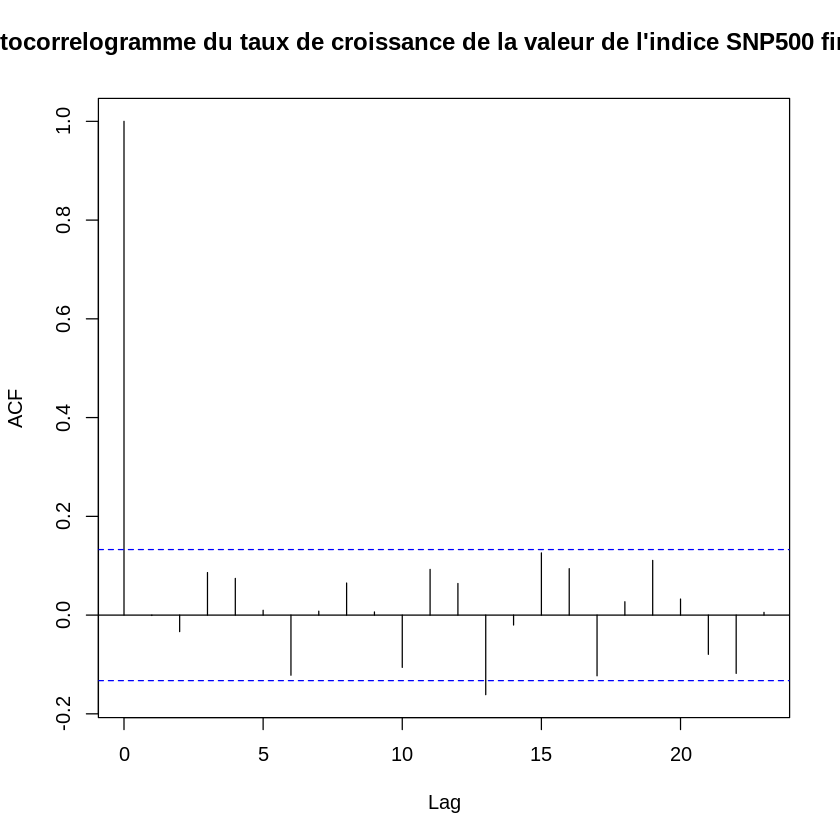

In [ ]:
df_g_short$g_RE[is.na(df_g_short$g_RE)] <- mean(df_g_short$g_RE, na.rm = TRUE)
acf(df_g_short$g_RE, main = "Autocorrelogramme du taux de croissance de la valeur de l'indice SNP500 financier")



L'autocorrelogramme du taux de croissance de la valeur ne montre aucun retard significatif, à l'exception du lag 0.

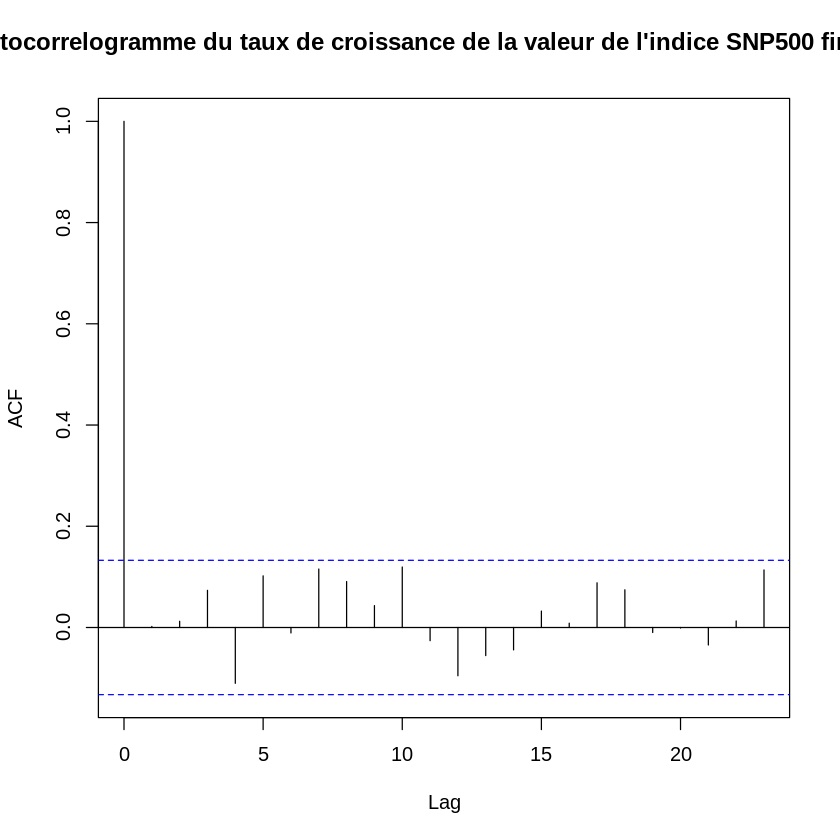

In [ ]:
df_g_short$g_Tech[is.na(df_g_short$g_Tech)] <- mean(df_g_short$g_Tech, na.rm = TRUE)
acf(df_g_short$g_Tech, main = "Autocorrelogramme du taux de croissance de la valeur de l'indice SNP500 financier")



L'autocorrelogramme du taux de croissance de la valeur ne montre aucun retard significatif, à l'exception du lag 0.

##Question 7


**Causalité de l'indice S&P 500 Financier sur le prix des matières premières**

Nous testons si la valeur de l'indice S&P 500 financier "cause" les autres au sens de Granger.




In [ ]:
causality(var.1lag,cause=c('g_FI'))

$Granger

	Granger causality H0: g_FI do not Granger-cause g_Tech g_MP g_RE

data:  VAR object var.1lag
F-Test = 2.2125, df1 = 3, df2 = 852, p-value = 0.08521


$Instant

	H0: No instantaneous causality between: g_FI and g_Tech g_MP g_RE

data:  VAR object var.1lag
Chi-squared = 70.837, df = 3, p-value = 2.776e-15



La statistique de test, égale à 2.2, est inférieure au seuil critique pour alpha = 5% (2.99). On ne rejette donc pas l'hypothèse nulle d'absence de causalité du prix des Fi sur les autres indices. La probabilité critique du test est égale à 0,8 ce qui est largement supérieur aux seuils courants (0,01 ou 0,05), conduisant aux mêmes conclusions.


In [ ]:
causality(var.1lag,cause=c('g_Tech'))


$Granger

	Granger causality H0: g_Tech do not Granger-cause g_FI g_MP g_RE

data:  VAR object var.1lag
F-Test = 1.3511, df1 = 3, df2 = 852, p-value = 0.2565


$Instant

	H0: No instantaneous causality between: g_Tech and g_FI g_MP g_RE

data:  VAR object var.1lag
Chi-squared = 58.564, df = 3, p-value = 1.191e-12



La statistique de test, égale à 1.35, est inférieure au seuil critique pour alpha = 5% qui est 2.99. On ne rejette donc pas l'hypothèse nulle d'absence de causalité du prix de l'indice Technologique sur les autres indices.

In [ ]:
causality(var.1lag,cause=c('g_RE'))

$Granger

	Granger causality H0: g_RE do not Granger-cause g_FI g_Tech g_MP

data:  VAR object var.1lag
F-Test = 0.35202, df1 = 3, df2 = 852, p-value = 0.7877


$Instant

	H0: No instantaneous causality between: g_RE and g_FI g_Tech g_MP

data:  VAR object var.1lag
Chi-squared = 54.703, df = 3, p-value = 7.945e-12



La statistique de test, égale à 0.35, est inférieure au seuil critique pour alpha = 5% qui est 2.99. On ne rejette donc pas l'hypothèse nulle d'absence de causalité du prix des real estate sur les autres indices.


## Bonus :

###Test Bulle Spéculative

Au regard du graphique de la série technologique, des interrogations surgissent quant à la présence d'une bulle spéculative.

In [ ]:
#Test ADF sans la constante ni la tendance déterministe.
adf_SNP_Technologie_F3 <- ur.df(y = na.omit(df$`technologie`),type=c("none"), lag=13, selectlags = c('AIC'))
summary(adf_SNP_Technologie_F3)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-319.00  -21.17    1.15   20.98  261.72 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
z.lag.1       0.015956   0.004900   3.256  0.00129 **
z.diff.lag1  -0.065387   0.065069  -1.005  0.31596   
z.diff.lag2  -0.059230   0.067889  -0.872  0.38383   
z.diff.lag3  -0.041216   0.066479  -0.620  0.53585   
z.diff.lag4   0.121422   0.068546   1.771  0.07776 . 
z.diff.lag5   0.006445   0.069100   0.093  0.92577   
z.diff.lag6  -0.061757   0.068429  -0.902  0.36769   
z.diff.lag7   0.187129   0.069635   2.687  0.00771 **
z.diff.lag8   0.133708   0.072039   1.856  0.06467 . 
z.diff.lag9  -0.214950   0.072488  -2.965  0.00333 **
z.diff.lag10 -0.106499   0.074617  -1.427  0.15480   
z.diff.lag11 -0.

Le critère AIC préconise 11 retard pour la régression ADF, ce qui est compatible avec les valeurs préconisées pour le test SADF. On peut remarquer que ce retard n'est pas singificativement différent de 0

In [ ]:
x<-log(df$`technologie`)
psy_minw(x) # taille conseillée de la fenetre d'estimation initiale
sprintf("La taille conseillée de la fenetre d'estimation initiale %f",psy_minw(x))
radf_result <-radf(x,lag=1) # utilise psy_minw(x) comme valeur par défaut
sprintf("La statistique du test SADF est %f",radf_D_PWY$sadf)


[1] 32

[1] "La taille conseillée de la fenetre d'estimation initiale 32.000000"

[1] "La statistique du test SADF est 1.565368"

Pour des échantillons de moins de 600 observations, les seuils critiques sont stockés dans radf_crit. Les seuils critiques dépendent du nombre d'observations de la fenêtre d'estimation initiale. Dans notre cas, la taille de cette fenêtre est égale à 32.

   90%   0.828476142922048  
   95%   1.16164264023064  
   99%   1.87638719521518


La statistique du test est supérieur aux seuils de rejet à 90% et 95%. On rejette l'hypothèse nulle de racine unitaire contre celle d'une dynamique explosive pour un risque de première espèce de 1%.

Dès que l'on rejete l'hypothèse nulle de racine unitaire en faveur de l'hypothèse alternative d'une dynamique explosive, on peut déterminer les dates initiale et finale de la bulle.

